<div class="alert alert-block alert-info">
  <center style="font-size: 2em;">Case 2 - Siemens</center>
  <center style="font-size: 1.5em;">Group T</center>
  <center style="font-size: 1.2em;">notebook 2</center>
  <center style="font-size: 1.2em;">Spring Semester/2025</center>
</div>

 #### This Project was made by:

André <br>
Student id <br>
@novaims.unl.pt <br>

Emir <br>
Student id <br>
@novaims.unl.pt <br>

Manuel Andrade <br>
 Student id <br>
 @novaims.unl.pt <br>

Victor Silva <br>
Student id <br>
@novaims.unl.pt  <br>

Rute D’Alva Teixeira <br>
20240667 <br>
20240667@novaims.unl.pt <br>

# Table of Contents


**1. [Imports](#imports)**  
   - [1.1. Importing Libraries](#libraries)  
   - [1.2. Importing Dataset](#datasets) 
   - [1.3. Importing Functions](#functions)  


<a class="anchor" id="imports"></a>
# 1. Imports

In [1]:
pip install NeuralProphet

Note: you may need to restart the kernel to use updated packages.


<a class="anchor" id="libraries"></a>
## 1.1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import inspect
from sklearn.preprocessing import OrdinalEncoder

# For Feature selection 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# import minmax scaler
from sklearn.preprocessing import MinMaxScaler
# import warning filter

import random
import torch
from sklearn.preprocessing import MinMaxScaler

import locale

# Set global seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)



warnings.filterwarnings("ignore")


C:\Users\mmsou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


<a class="anchor" id="datasets"></a>
## 1.2. Importing Datasets

In [3]:
df_processed = pd.read_csv("df_processed.csv")
pd.set_option('display.max_columns', None)  # Show all columns


In [4]:
df_train = pd.read_csv("df_train.csv")
df_train.head()

,Year-Month,Mapped_GCK,Sales_EUR
0,2018-10-01,#1,36098919.06
1,2018-10-01,#11,1021303.50
2,2018-10-01,#12,28686.33
3,2018-10-01,#13,27666.10
4,2018-10-01,#14,5770.00


In [5]:
df_test = pd.read_csv("Case2_Test Set Template.csv", delimiter=';')
df_test.head()

,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,NaN
1,Jun 22,#3,NaN
2,Jul 22,#3,NaN
3,Aug 22,#3,NaN
4,Sep 22,#3,NaN


<a class="anchor" id="functions"></a>
## 1.3. Importing functions

In [6]:
with open('functions_nb1.py', 'r') as f:
    function_code = f.read()

# Execute the code to define the function
exec(function_code)

In [7]:
# call the function to get the best lags with all columns excpetthe first 3
best_lags = get_best_lags(df_processed, "Sales_EUR", df_processed.columns[3:])


In [8]:
for gck, col_lags in best_lags.items():
    print(f"\n📊 Top 3 correlations for GCK {gck}:")
    
    # Sort the columns by correlation (second item in the value tuple)
    top_cols = sorted(col_lags.items(), key=lambda item: item[1][1], reverse=True)[:3]

    for col, (lag, corr) in top_cols:
        print(f"➡️ {col} | Lag: {lag} | Corr: {corr:.2f}")



📊 Top 3 correlations for GCK #1:
➡️ Producer Prices.2_Italy: Electrical equipment | Lag: 16 | Corr: 0.54
➡️ CSI 300 Average Stock Price_norm | Lag: 52 | Corr: 0.48
➡️ China_Production Index Machinery & Electricals | Lag: 58 | Corr: 0.45

📊 Top 3 correlations for GCK #3:
➡️ Chinese short term interest rates_norm | Lag: 11 | Corr: 0.62
➡️ China_Production Index Machinery & Electricals | Lag: 11 | Corr: 0.59
➡️ production index.11_United Kingdom: Electrical equipment | Lag: 8 | Corr: 0.55

📊 Top 3 correlations for GCK #4:
➡️ CSI 300 Average Stock Price_norm | Lag: 39 | Corr: 0.43
➡️ US Unemployment Rate_norm | Lag: 10 | Corr: 0.43
➡️ production index.11_United Kingdom: Electrical equipment | Lag: 20 | Corr: 0.39

📊 Top 3 correlations for GCK #5:
➡️ Germany.1_Shipments Index Machinery & Electricals | Lag: 45 | Corr: 0.57
➡️ Germany_Production Index Machinery & Electricals | Lag: 45 | Corr: 0.53
➡️ China_Production Index Machinery & Electricals | Lag: 57 | Corr: 0.46

📊 Top 3 correlations 

### From here forward:
-  data is spliited by Mapped_GKC, resulting in 14 different dataframes
- each dataframe is callable by GCK_dfs["df_#[GKCnumber]"]

In [9]:
# Example usage
GCK_dfs = to_GCK(best_lags, df_processed)
GCK_dfs.keys()

dict_keys(['df_#1', 'df_#3', 'df_#4', 'df_#5', 'df_#6', 'df_#8', 'df_#9', 'df_#11', 'df_#12', 'df_#13', 'df_#14', 'df_#16', 'df_#20', 'df_#36'])

# 6. Data Validation

## 6.1. Logical Checks

`Step 1` Confirm there are no missing values

In [10]:
has_missing = False

for name, df in GCK_dfs.items():
    if df.isna().any().sum():  # Check if there are any NaNs
        print(f"{name} contains missing values.")
        has_missing = True

if not has_missing:
    print("None of the 14 dataframes have missing values.")



None of the 14 dataframes have missing values.


`Step 2` As we import and export data, some features may change dtypes - we should update datatypes, if applicable


`Market data`

In [11]:
for name, df in GCK_dfs.items():
    # Convert "Year-Month" to datetime period (M) if not already datetime
    if "Year-Month" in df.columns and df["Year-Month"].dtype != "datetime64[ns]":
        df["Year-Month"] = pd.to_datetime(df["Year-Month"]).dt.to_period("M")
    
    # Convert "Mapped_GKC" to object if not already object
    if "Mapped_GKC" in df.columns and df["Mapped_GKC"].dtype != "object":
        df["Mapped_GKC"] = df["Mapped_GKC"].astype(object)
    
    # Convert all other columns (excluding "Year-Month" and "Mapped_GKC") to float if not already float
    for col in df.columns:
        if col not in ["Year-Month", "Mapped_GKC"] and df[col].dtype != "float64":
            df[col] = df[col].astype(float)


In [12]:
# Loop through each DataFrame and check "Year-Month" column data type
for name, df in GCK_dfs.items():
    if "Year-Month" in df.columns:
        print(f"{name}: {df['Year-Month'].dtype}")

df_#1: datetime64[ns]
df_#3: datetime64[ns]
df_#4: datetime64[ns]
df_#5: datetime64[ns]
df_#6: datetime64[ns]
df_#8: datetime64[ns]
df_#9: datetime64[ns]
df_#11: datetime64[ns]
df_#12: datetime64[ns]
df_#13: datetime64[ns]
df_#14: datetime64[ns]
df_#16: datetime64[ns]
df_#20: datetime64[ns]
df_#36: datetime64[ns]


`Train data (Sales)`

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year-Month  602 non-null    object 
 1   Mapped_GCK  602 non-null    object 
 2   Sales_EUR   602 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.2+ KB


"Year-Month" has an incorrect datatype. Let's convert it to datetime, in month-period format

In [14]:
df_train["Year-Month"] = pd.to_datetime(df_train["Year-Month"]).dt.to_period("M")

## 6.2. Numerical/Categorical Partition

# 7. Encoding - Categorical Data

## 7.1.1. Evaluation of best technique
The encoders we decide to use must be suitable for our dataset, and the most important factors to decide which method is the best includes:

- model interpretability, based on the algorithms we will assess
- count of unique values
- ordinality nature of feature
- whether features have a fixed and finite count of unique categories or not

`Count of unique values`

## 7.1.2. Applying encoding techniques

`Year-Month`

## 9 - Feature Selection

## 9.1 - Lasso Regression 

In [15]:

def apply_lasso(df):
    """
    Applies Lasso regression with cross-validation to the given DataFrame.

    Parameters:
    - df: DataFrame containing the data

    Returns:
    - coef_df: DataFrame containing the non-zero coefficients sorted by absolute value
    """
    # Step 1: Define features and target
    X = df.drop(columns=["Sales_EUR", "Year-Month"])
    y = df["Sales_EUR"]

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 3: Lasso with cross-validation to find best alpha
    lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

    # Step 4: Predictions
    y_pred = lasso.predict(X_test_scaled)

    # Step 5: Show feature importances
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": lasso.coef_
    })

    # Keep only non-zero coefficients
    coef_df = coef_df[coef_df["Coefficient"] != 0]

    # Sort by absolute coefficient value
    coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False).reset_index(drop=True)

    return coef_df

# Apply Lasso regression
df = GCK_dfs["df_#1"]
lasso_results = apply_lasso(df)
lasso_results


,Feature,Coefficient
0,Producer Prices.2_Italy: Electrical equipment_...,1.986095e+06
1,CH_Holidays_lag_16,2.950302e+05
2,World: Price of Copper_lag_18,3.933251e+04


In [16]:
df.head()

,Year-Month,Sales_EUR,China_Production Index Machinery & Electricals_lag_58,France_Production Index Machinery & Electricals_lag_51,Germany_Production Index Machinery & Electricals_lag_34,Germany.1_Shipments Index Machinery & Electricals_lag_34,Japan.1_Shipments Index Machinery & Electricals_lag_31,Switzerland_Production Index Machinery & Electricals_lag_44,United Kingdom.1_Shipments Index Machinery & Electricals_lag_30,United States.1_Shipments Index Machinery & Electricals_lag_16,Europe_Production Index Machinery & Electricals_lag_34,World: Price of Energy_lag_34,World: Price of Metals & Minerals_lag_30,World: Price of Natural gas index_lag_33,"World: Price of Crude oil, average_lag_34",World: Price of Copper_lag_18,United States: EUR in LCU_lag_19,Producer Prices.2_Italy: Electrical equipment_lag_16,Producer Prices.3_France: Electrical equipment_lag_14,production index_United States: Machinery and equipment n.e.c._lag_25,production index.2_Switzerland: Machinery and equipment n.e.c._lag_44,production index.3_United Kingdom: Machinery and equipment n.e.c._lag_25,production index.6_France: Machinery and equipment n.e.c._lag_51,production index.8_United States: Electrical equipment_lag_40,production index.10_Switzerland: Electrical equipment_lag_32,production index.11_United Kingdom: Electrical equipment_lag_30,production index.12_Italy: Electrical equipment_lag_39,production index.13_Japan: Electrical equipment_lag_25,production index.14_France: Electrical equipment_lag_51,production index.15_Germany: Electrical equipment_lag_59,US_Holidays_lag_29,DE_Holidays_lag_16,CH_Holidays_lag_16,IT_Holidays_lag_40,CN_Holidays_lag_42,FR_Holidays_lag_41,JP_Holidays_lag_29,Siemens Average Stock Price_norm_lag_33,SPY Average Stock Price_norm_lag_58,CSI 300 Average Stock Price_norm_lag_52,US Unemployment Rate_norm_lag_12,Chinese short term interest rates_norm_lag_11,Average 10Y Yields_norm_lag_46,Average 1Y Yields_norm_lag_52
1974,2018-10-01,36098919.06,193.875463,103.642503,119.078677,138.642623,141.824202,94.192688,94.097986,125.498703,110.009574,48.300350,61.998946,54.220254,46.271478,75.435518,1.0685,104.881638,101.351013,97.875633,92.165610,98.833149,107.817261,109.156631,92.104019,99.032033,88.453758,116.139868,96.880730,106.953156,1.0,1.0,0.0,1.0,2.0,4.0,3.0,126.134560,171.980631,62.937775,42.857143,99.598360,59.126155,30.296441
1988,2018-11-01,5140760.27,121.871889,61.535962,90.096990,96.187839,98.068077,89.251542,91.140171,105.877617,89.141971,40.856136,59.979490,48.433180,37.676758,74.316175,1.0723,103.633049,101.351013,98.363998,84.245128,86.772847,60.812183,104.555161,91.536643,96.158068,36.457806,99.138606,62.708252,85.706924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,122.246906,165.918614,64.525607,42.857143,99.577810,50.399690,32.205618
2002,2018-12-01,37889612.12,121.871889,109.226617,106.912859,114.911661,96.066022,90.088938,103.749253,117.463007,103.161801,42.840326,60.256681,44.494834,39.258220,75.911444,1.1058,103.737099,101.351013,95.949661,87.344447,94.029469,116.142136,108.593170,91.820331,111.246383,85.346130,107.939558,98.025688,99.424149,1.0,0.0,1.0,1.0,2.0,1.0,1.0,133.243415,173.470528,68.778348,41.836735,99.554358,52.911321,30.984997
2016,2019-01-01,27728148.89,167.856570,101.788409,117.245863,129.473166,114.557280,90.926333,91.438817,121.379797,113.280655,48.741172,63.492552,46.626993,47.241442,79.433246,1.1229,104.257347,101.351013,94.385437,90.443766,90.247849,103.350258,105.691246,92.104019,95.080331,85.876709,111.549277,99.258713,102.002579,0.0,0.0,0.0,0.0,0.0,1.0,1.0,130.339575,174.140981,70.822275,40.816327,99.527311,54.718480,31.673552
2030,2019-02-01,34793163.80,155.539950,95.267762,111.394093,120.771088,110.633924,91.763728,92.571038,118.280842,106.556896,52.276382,63.780197,48.167559,51.555671,86.075909,1.1511,104.569489,101.351013,98.692001,93.543085,85.035346,97.969543,110.734062,92.387707,99.032033,82.011116,99.567611,90.891739,106.128059,1.0,2.0,0.0,0.0,0.0,0.0,2.0,138.448112,175.351522,71.515211,41.836735,99.49591

## 9.2 - Ridge regression

In [17]:
def apply_ridge(df):
    """
    Applies Ridge regression with cross-validation to the given DataFrame.

    Parameters:
    - df: DataFrame containing the data

    Returns:
    - coef_df: DataFrame containing the top 15 coefficients sorted by absolute value
    """
    # Step 1: Define features and target
    X = df.drop(columns=["Sales_EUR", "Year-Month"])
    y = df["Sales_EUR"]

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 3: Ridge with cross-validation to find best alpha
    ridge = RidgeCV(cv=5).fit(X_train_scaled, y_train)

    # Step 4: Show feature importances
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": ridge.coef_
    })

    # Sort by absolute coefficient value and keep top 15
    coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False).reset_index(drop=True).head(15)

    return coef_df

# Apply Ridge regression
ridge_results = apply_ridge(df)
ridge_results

,Feature,Coefficient
0,World: Price of Copper_lag_18,1.514188e+06
1,United States: EUR in LCU_lag_19,1.141833e+06
2,Producer Prices.2_Italy: Electrical equipment_...,1.038756e+06
3,Average 10Y Yields_norm_lag_46,9.304494e+05
4,production index.8_United States: Electrical e...,8.584019e+05
5,IT_Holidays_lag_40,8.492912e+05
6,United States.1_Shipments Index Machinery & El...,8.451914e+05
7,CN_Holidays_lag_42,8.317489e+05
8,production index.11_United Kingdom: Electrical...,8.305819e+05
9,CSI 300 Average Stock Price_norm_lag_52,8.218440e+05


## 9.3 - Decision Tree

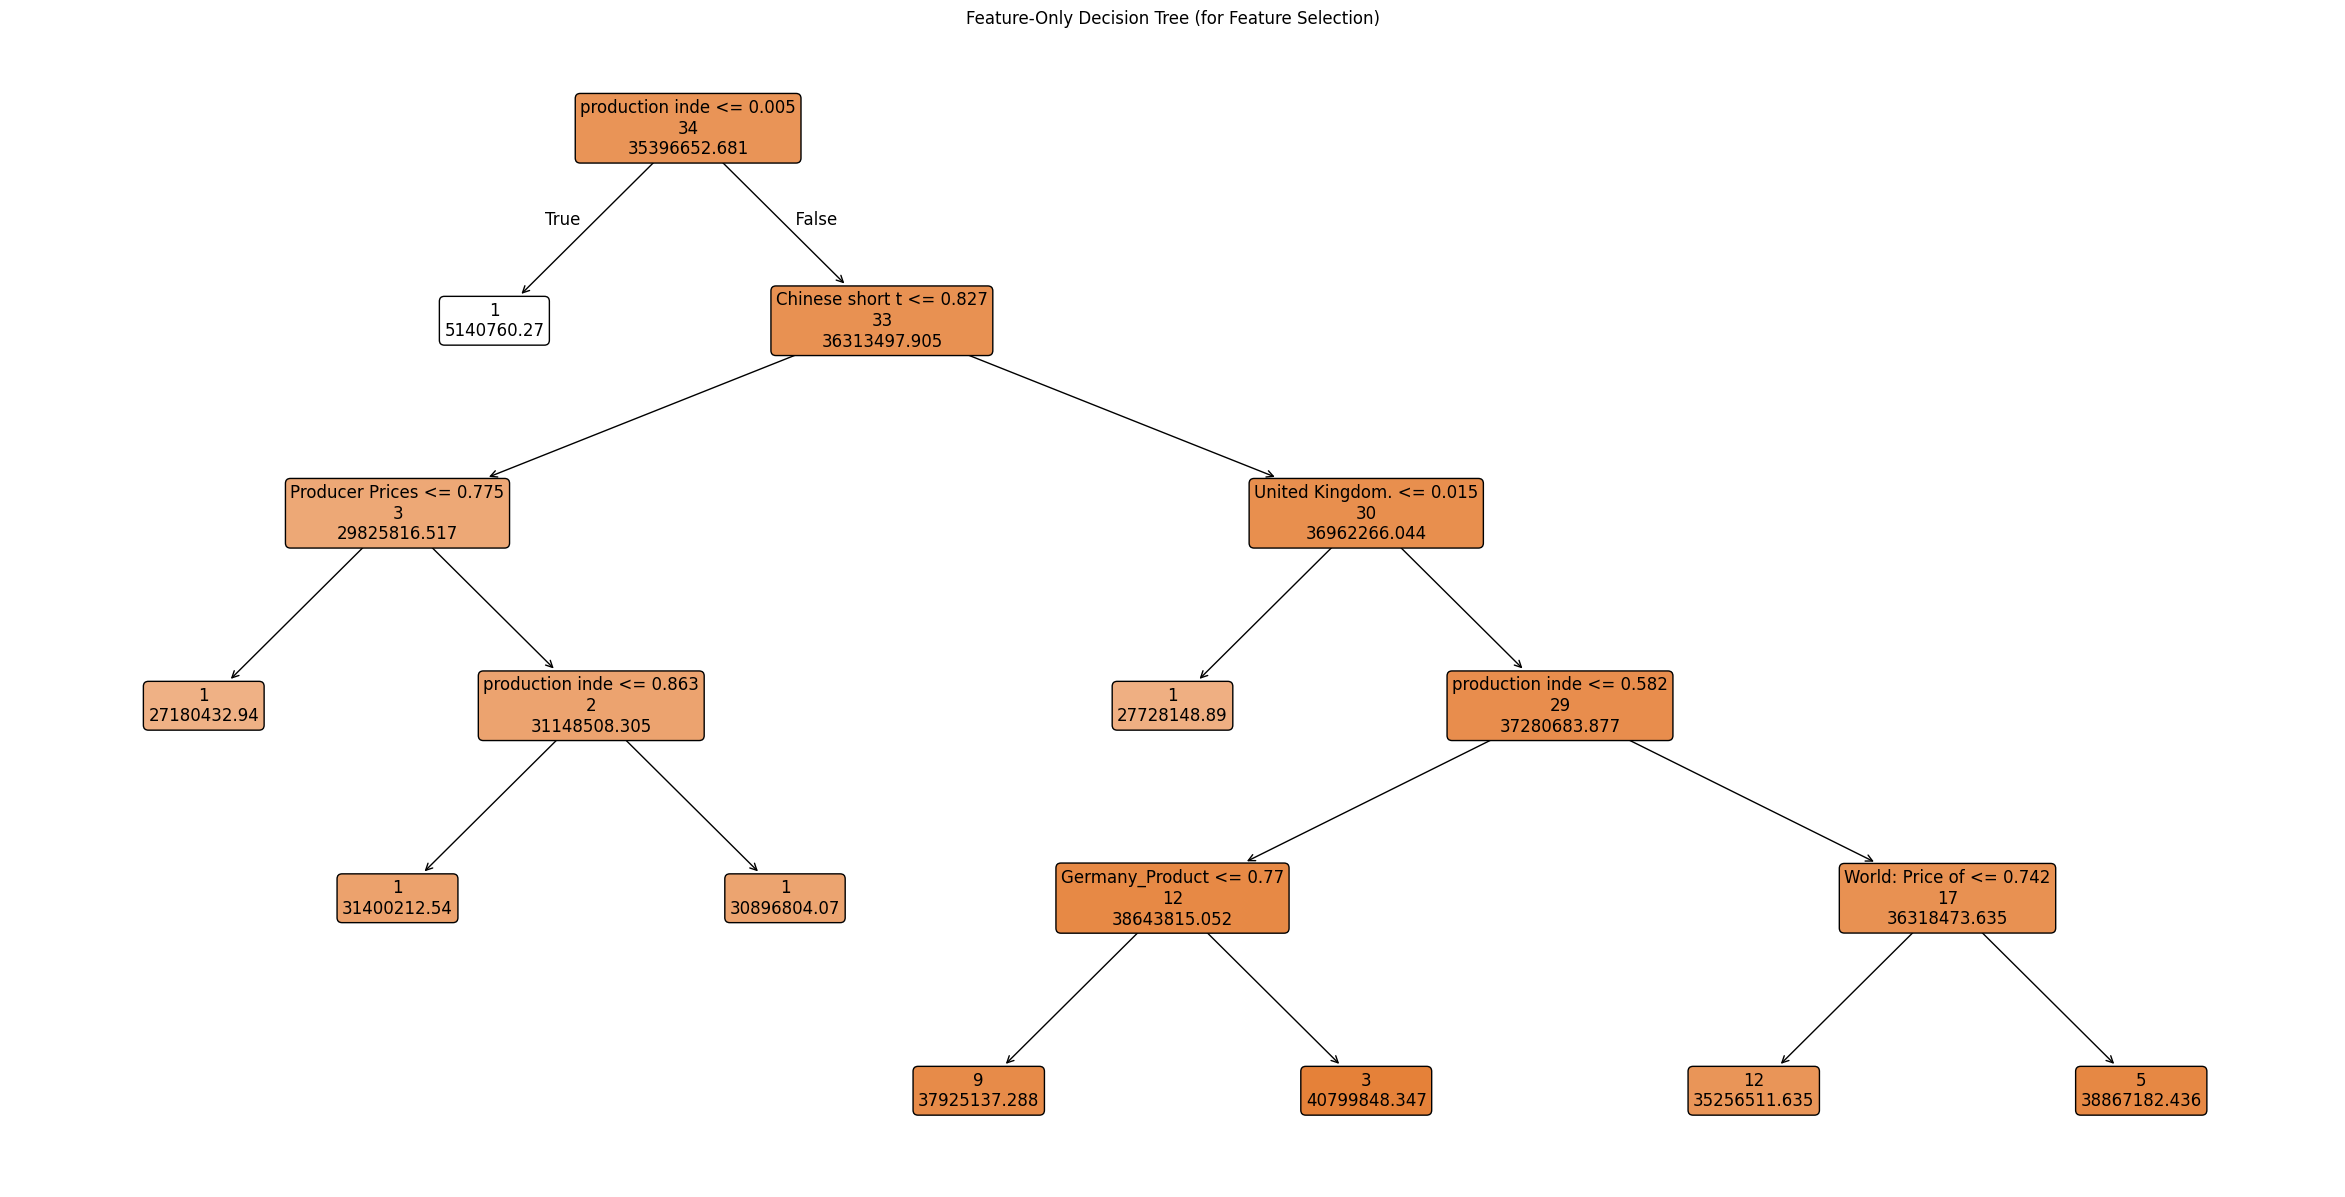


Feature importances from Decision Tree (only features in the tree):
production index.10_Switzerland: Electrical equipment_lag_32: 0.7348
Chinese short term interest rates_norm_lag_11: 0.1082
United Kingdom.1_Shipments Index Machinery & Electricals_lag_30: 0.0687
World: Price of Copper_lag_18: 0.0358
production index.14_France: Electrical equipment_lag_51: 0.0296
Germany_Production Index Machinery & Electricals_lag_34: 0.0145
Producer Prices.2_Italy: Electrical equipment_lag_16: 0.0082
production index.15_Germany: Electrical equipment_lag_59: 0.0001


In [18]:
def apply_decision_tree(df):
    """
    Applies Decision Tree regression and shows a feature-only split tree.
    Useful for feature selection.
    """
    # Step 1: Define features and target
    X = df.drop(columns=["Sales_EUR", "Year-Month"])
    y = df["Sales_EUR"]

    # Optional: Shorten feature names
    short_feature_names = [col[:15] for col in X.columns]

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Step 3: Scale features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 4: Train Decision Tree
    tree = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree.fit(X_train_scaled, y_train)

    # Step 5: Plot simplified tree with only feature name and threshold
    plt.figure(figsize=(30, 15))
    plot_tree(
        tree,
        feature_names=short_feature_names,
        filled=True,
        rounded=True,
        impurity=False,
        label='none',      # ✅ hides value/samples/impurity
        fontsize=12
    )
    plt.title("Feature-Only Decision Tree (for Feature Selection)")
    plt.show()

    # Step 6: Get features used in the tree
    used_features_indices = set(tree.tree_.feature[tree.tree_.feature >= 0])  # Exclude -2 (leaf nodes)
    used_features = [X.columns[i] for i in used_features_indices]

    # Step 7: Sort features by importance (descending order)
    feature_importances = [
        (feature, importance)
        for feature, importance in zip(X.columns, tree.feature_importances_)
        if feature in used_features
    ]
    feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

    # Print the feature importances in descending order
    print("\nFeature importances from Decision Tree (only features in the tree):")
    for feature, importance in feature_importances:
        print(f"{feature}: {importance:.4f}")

# Apply Decision Tree regression
apply_decision_tree(df)

## 9.4 - Variance Test 

In [19]:
def variance_test(df, top_n=20, target_col="Sales_EUR"):
    """
    Calculates the variance of each numeric feature in the DataFrame and outputs
    the top N features sorted from highest to lowest variance, excluding the target variable.

    Parameters:
    - df: DataFrame containing the features (excluding target columns like 'Sales_EUR').
    - top_n: Number of top features to display (default is 20).
    - target_col: The target variable to exclude from the variance calculation.

    Returns:
    - A sorted Pandas Series of variances from highest to lowest.
    """
    # Select only numeric columns and exclude the target column
    numeric_df = df.select_dtypes(include=["number"]).drop(columns=[target_col], errors="ignore")

    # Calculate variance for each numeric feature
    variances = numeric_df.var()

    # Sort features by variance in descending order
    sorted_variances = variances.sort_values(ascending=False)

    # Print the top N features and their variances
    print(f"Top {top_n} Features by Variance (sorted from highest to lowest):")
    for feature, variance in sorted_variances.head(top_n).items():
        print(f"{feature}: {variance:.4f}")

    # Return the sorted variances
    return sorted_variances

# Example usage
# Assuming GCK_dfs["df_#1"] is one of the DataFrames
sorted_variances = variance_test(df, top_n=20, target_col="Sales_EUR")

Top 20 Features by Variance (sorted from highest to lowest):
Average 1Y Yields_norm_lag_52: 15759.0956
US Unemployment Rate_norm_lag_12: 746.9675
China_Production Index Machinery & Electricals_lag_58: 626.7021
CSI 300 Average Stock Price_norm_lag_52: 310.3437
Siemens Average Stock Price_norm_lag_33: 267.7852
production index.6_France: Machinery and equipment n.e.c._lag_51: 236.0264
World: Price of Energy_lag_34: 231.0117
World: Price of Crude oil, average_lag_34: 228.7305
SPY Average Stock Price_norm_lag_58: 211.7980
production index.12_Italy: Electrical equipment_lag_39: 184.3726
Japan.1_Shipments Index Machinery & Electricals_lag_31: 172.5839
France_Production Index Machinery & Electricals_lag_51: 169.9671
World: Price of Natural gas index_lag_33: 153.6283
Germany.1_Shipments Index Machinery & Electricals_lag_34: 147.4511
production index.13_Japan: Electrical equipment_lag_25: 113.0313
production index.14_France: Electrical equipment_lag_51: 99.2413
Average 10Y Yields_norm_lag_46: 95

## 9.5 - Getting the best featrues per GCK

In [20]:
from collections import Counter

def run_feature_selection_with_voting(df, target_column, min_votes=2):
    """
    Runs 4 feature selection methods and returns features selected by at least `min_votes` methods.
    
    Parameters:
        df (pd.DataFrame)
        target_column (str)
        min_votes (int): Minimum number of methods that must agree
    
    Returns:
        list: Features selected by at least `min_votes` methods
    """
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import Lasso, Ridge
    from sklearn.feature_selection import VarianceThreshold
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.preprocessing import StandardScaler

    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Keep only numeric columns
    X = X.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Lasso
    lasso = Lasso(alpha=0.01, max_iter=10000)
    lasso.fit(X_scaled, y)
    lasso_top = pd.Series(lasso.coef_, index=X.columns).abs().sort_values(ascending=False).head(10).index.tolist()

    # Ridge
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_scaled, y)
    ridge_top = pd.Series(ridge.coef_, index=X.columns).abs().sort_values(ascending=False).head(10).index.tolist()

    # Variance
    selector = VarianceThreshold()
    selector.fit(X)
    var_series = pd.Series(X.var(), index=X.columns)
    var_top = var_series[selector.get_support()].sort_values(ascending=False).head(10).index.tolist()

    # Decision Tree
    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X, y)
    tree_top = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False).head(10).index.tolist()

    # Count votes
    combined = lasso_top + ridge_top + var_top + tree_top
    counts = Counter(combined)

    # Select features that appear in at least `min_votes` methods
    voted_features = [feature for feature, count in counts.items() if count >= min_votes]

    return voted_features

In [21]:
# Apply feature selection and filter each dataframe
for key in GCK_dfs.keys():
    df = GCK_dfs[key]
    
    # Run feature selection
    selected_features = run_feature_selection_with_voting(df, target_column="Sales_EUR")
    
    # Columns to keep
    columns_to_keep = ["Year-Month", "Sales_EUR"] + selected_features
    
    # Filter the dataframe and update in-place
    GCK_dfs[key] = df[columns_to_keep]



In [22]:
GCK_dfs["df_#1"]
# Change all negative values in GCK_dfs in the column Sales_EUR andn change that to 0
for key in GCK_dfs.keys():
    df = GCK_dfs[key]
    
    # Set negative values to 0
    df.loc[df["Sales_EUR"] < 0, "Sales_EUR"] = 0

    # Update the dictionary
    GCK_dfs[key] = df

## 10 - Modelling 


### 10.1 - Create the Prophet Function

### 10.2 - Adding the optimal seed and model to the GCK dict

In [23]:
"""
def train_and_evaluate_group(df, data_split='2020-12-01', n_lags=10):
    
    Train a NeuralProphet model with lags and macroeconomic regressors, and evaluate it using RMSE.

    Parameters:
        df (pd.DataFrame): DataFrame with columns including 'Year-Month', 'Sales_EUR', and macro regressors.
        data_split (str): Date string to split training and testing data (format: 'YYYY-MM-DD').
        n_lags (int): Number of lags to use for autoregression.

    Returns:
        seed (int): The fixed seed used for training.
        rmse (float): The RMSE achieved.
        model (NeuralProphet): The trained NeuralProphet model.
        y_pred (np.ndarray): Predicted values.
        y_true (np.ndarray): Ground truth values.
        df_test (pd.DataFrame): Test DataFrame.
    
    # --- Set a fixed seed for reproducibility ---
    seed = 75
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # --- Step 1: Preprocess dataframe ---
    df['ds'] = pd.to_datetime(df['Year-Month'])
    df = df.rename(columns={'Sales_EUR': 'y'})
    df['y'] = df['y'].where(df['y'] > 0, 0)
    
    # ⚠️ Remove '_lag_' from column names to ensure consistency
    # ⚠️ Only strip '_lag_' if it's present in any column name
    if any('_lag_' in col for col in df.columns):
        df.columns = [col.split('_lag_')[0] if '_lag_' in col else col for col in df.columns]


    # Identify macroeconomic regressors (all columns between index 3 and second to last)
    macro_cols = list(df.columns[3:-1])

    # Normalize y and macro columns
    scaler = MinMaxScaler()
    df[macro_cols] = scaler.fit_transform(df[macro_cols])
    df["y"] = scaler.fit_transform(df[["y"]])

    # --- Step 2: Split into train and test sets ---
    df_train = df[df['ds'] <= data_split].copy()
    df_test = df[df['ds'] > data_split].copy()

    # --- Step 3: Initialize NeuralProphet model ---
    model = NeuralProphet(
        n_lags=n_lags,
        n_forecasts=1,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
    )

    # --- Step 4: Add macroeconomic regressors ---
    for col in macro_cols:
        model.add_future_regressor(col)

    # --- Step 5: Fit the model ---
    model.fit(df_train[['ds', 'y'] + macro_cols], freq='MS', learning_rate=1.0, early_stopping=False)

    # --- Step 6: Prepare full data for prediction ---
    df_full = pd.concat([df_train, df_test]).reset_index(drop=True)
    forecast = model.predict(df_full[['ds', 'y'] + macro_cols])

    # --- Step 7: Filter predictions to test period only ---
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])].copy()
    df_true = df_test[['ds', 'y']]
    comparison = forecast_test[['ds', 'yhat1']].merge(df_true, on='ds', how='left')
    comparison = comparison.dropna()

    # --- Step 8: Evaluate with RMSE ---
    y_true = comparison['y'].values
    y_pred = comparison['yhat1'].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return seed, rmse, model, y_pred, y_true, df_test"""

'\ndef train_and_evaluate_group(df, data_split=\'2020-12-01\', n_lags=10):\n    \n    Train a NeuralProphet model with lags and macroeconomic regressors, and evaluate it using RMSE.\n\n    Parameters:\n        df (pd.DataFrame): DataFrame with columns including \'Year-Month\', \'Sales_EUR\', and macro regressors.\n        data_split (str): Date string to split training and testing data (format: \'YYYY-MM-DD\').\n        n_lags (int): Number of lags to use for autoregression.\n\n    Returns:\n        seed (int): The fixed seed used for training.\n        rmse (float): The RMSE achieved.\n        model (NeuralProphet): The trained NeuralProphet model.\n        y_pred (np.ndarray): Predicted values.\n        y_true (np.ndarray): Ground truth values.\n        df_test (pd.DataFrame): Test DataFrame.\n    \n    # --- Set a fixed seed for reproducibility ---\n    seed = 75\n    torch.manual_seed(seed)\n    np.random.seed(seed)\n    random.seed(seed)\n\n    # --- Step 1: Preprocess dataframe -

In [24]:

def train_and_evaluate_group(df, data_split='2020-12-01', n_lags=10):
    """
    Train a NeuralProphet model with lags and macroeconomic regressors, and evaluate it using RMSE.

    Parameters:
        df (pd.DataFrame): DataFrame with columns including 'Year-Month', 'Sales_EUR', and macro regressors.
        data_split (str): Date string to split training and testing data (format: 'YYYY-MM-DD').
        n_lags (int): Number of lags to use for autoregression.

    Returns:
        seed (int): The fixed seed used for training.
        rmse (float): The RMSE achieved.
        model (NeuralProphet): The trained NeuralProphet model.
        y_pred (np.ndarray): Predicted values.
        y_true (np.ndarray): Ground truth values.
        df_test_raw (pd.DataFrame): Original test set (without context rows).
    """

    # --- Set a fixed seed for reproducibility ---
    seed = 75
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # --- Step 1: Preprocess dataframe ---
    df['ds'] = pd.to_datetime(df['Year-Month'])
    df = df.rename(columns={'Sales_EUR': 'y'})
    df['y'] = df['y'].where(df['y'] > 0, 0)

    # ✅ Remove trailing underscores and handle '_lag_' in column names
    def clean_column_name(col):
        if '_lag_' in col:
            return col.split('_lag_')[0]  # Keep only the part before '_lag_'
        return col.rstrip('_')  # Remove trailing underscores

    df.columns = [clean_column_name(col) for col in df.columns]

    # Identify macroeconomic regressors (all columns between index 3 and second to last)
    macro_cols = list(df.columns[3:-1])

    # Normalize y and macro columns
    scaler = MinMaxScaler()
    df[macro_cols] = scaler.fit_transform(df[macro_cols])
    df["y"] = scaler.fit_transform(df[["y"]])

    # --- Step 2: Split into train and test sets ---
    df_train = df[df['ds'] <= data_split].copy()
    df_test_raw = df[df['ds'] > data_split].copy()

    # ⚠ Include last n_lags rows from train for lag context in test
    df_context = df_train.tail(n_lags).copy()
    df_test = pd.concat([df_context, df_test_raw]).reset_index(drop=True)

    # --- Step 3: Initialize NeuralProphet model ---
    model = NeuralProphet(
        n_lags=n_lags,
        n_forecasts=1,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
    )

    # --- Step 4: Add macroeconomic regressors ---
    for col in macro_cols:
        model.add_future_regressor(col)

    # --- Step 5: Fit the model ---
    model.fit(df_train[['ds', 'y'] + macro_cols], freq='MS', learning_rate=1.0, early_stopping=False)

    # --- Step 6: Prepare full data for prediction ---
    df_full = pd.concat([df_train, df_test_raw]).reset_index(drop=True)
    forecast = model.predict(df_full[['ds', 'y'] + macro_cols])

    # --- Step 7: Filter predictions to test period + context ---
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])].copy().reset_index(drop=True)

    # --- Step 8: Remove context rows before evaluating ---
    forecast_test = forecast_test.iloc[n_lags:]
    df_test_raw = df_test_raw.reset_index(drop=True)

    # --- Step 9: Evaluate with RMSE ---
    df_true = df_test_raw[['ds', 'y']]
    comparison = forecast_test[['ds', 'yhat1']].merge(df_true, on='ds', how='left')
    comparison = comparison.dropna()

    y_true = comparison['y'].values
    y_pred = comparison['yhat1'].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return seed, rmse, model, y_pred, y_true, df_test_raw

In [25]:
def seed_and_model_includer_all(dfs_dict):
    """
    For each key-value pair in the dictionary, runs train_and_evaluate_group to find the best seed and model.
    
    Parameters:
        dfs_dict (dict): A dictionary where keys are names and values are DataFrames.

    Returns:
        dict: A new dictionary where each key is the original key and each value is a dictionary containing:
              - the original DataFrame
              - the best-performing seed
              - the trained model for that seed
    """
    new_dict = {}

    for key, df in dfs_dict.items():
        print(f"Processing {key}...")  # Optional: Add progress logging
        best_seed, best_rmse, best_model, best_y_pred, best_y_true, best_df_test = train_and_evaluate_group(df, n_lags=12)
        new_dict[key] = {
            "df": df,
            "seed": best_seed,
            "model": best_model,
            "rmse": best_rmse,
        }
    
    return new_dict

# Example usage
updated_dict = seed_and_model_includer_all(GCK_dfs)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Processing df_#1...
Training: |          | 0/? [00:09<?, ?it/s, v_num=1305, train_loss=1.12e-6, reg_loss=0.000, MAE=0.000559, RMSE=0.000726, Loss=1.18e-6, RegLoss=0.000]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 239.17it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Processing df_#3...


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:12<?, ?it/s, v_num=1306, train_loss=1.11e-6, reg_loss=0.000, MAE=0.000313, RMSE=0.000448, Loss=1.1e-6, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 221.80it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Processing df_#4...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:13<?, ?it/s, v_num=1307, train_loss=3.14e-6, reg_loss=0.000, MAE=0.000713, RMSE=0.000911, Loss=3.31e-6, RegLoss=0.000]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.94it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Processing df_#5...


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:15<?, ?it/s, v_num=1308, train_loss=2.05e-6, reg_loss=0.000, MAE=0.000573, RMSE=0.000817, Loss=2.13e-6, RegLoss=0.000]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.01it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Processing df_#6...


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:15<?, ?it/s, v_num=1309, train_loss=4.44e-7, reg_loss=0.000, MAE=0.000405, RMSE=0.000499, Loss=4.47e-7, RegLoss=0.000]


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 133.56it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Processing df_#8...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:11<?, ?it/s, v_num=1310, train_loss=1.95e-7, reg_loss=0.000, MAE=0.000105, RMSE=0.00014, Loss=1.97e-7, RegLoss=0.000] 

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 184.46it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Processing df_#9...


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:10<?, ?it/s, v_num=1311, train_loss=1.93e-5, reg_loss=0.000, MAE=0.00133, RMSE=0.00197, Loss=1.95e-5, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.33it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Processing df_#11...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:08<?, ?it/s, v_num=1312, train_loss=6.27e-7, reg_loss=0.000, MAE=0.000389, RMSE=0.000572, Loss=6.4e-7, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.09it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Processing df_#12...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:08<?, ?it/s, v_num=1313, train_loss=4.08e-6, reg_loss=0.000, MAE=0.000864, RMSE=0.00131, Loss=4.1e-6, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 234.15it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Processing df_#13...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:09<?, ?it/s, v_num=1314, train_loss=1.76e-5, reg_loss=0.000, MAE=0.00211, RMSE=0.00306, Loss=1.79e-5, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Processing df_#14...


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:08<?, ?it/s, v_num=1315, train_loss=6.48e-8, reg_loss=0.000, MAE=5.98e-5, RMSE=8.13e-5, Loss=6.57e-8, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Processing df_#16...


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:08<?, ?it/s, v_num=1316, train_loss=3.33e-7, reg_loss=0.000, MAE=0.000135, RMSE=0.000194, Loss=3.44e-7, RegLoss=0.000]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 621.75it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Processing df_#20...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:09<?, ?it/s, v_num=1317, train_loss=5.61e-7, reg_loss=0.000, MAE=0.00036, RMSE=0.000508, Loss=5.57e-7, RegLoss=0.000] 


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 133.83it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Processing df_#36...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 500


Training: |          | 0/? [00:08<?, ?it/s, v_num=1318, train_loss=1.23e-7, reg_loss=0.000, MAE=3.24e-5, RMSE=4.42e-5, Loss=1.28e-7, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.674]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.727]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 124.35it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [26]:
updated_dict.keys()

dict_keys(['df_#1', 'df_#3', 'df_#4', 'df_#5', 'df_#6', 'df_#8', 'df_#9', 'df_#11', 'df_#12', 'df_#13', 'df_#14', 'df_#16', 'df_#20', 'df_#36'])

In [27]:
best_lags.keys()

dict_keys(['#1', '#3', '#4', '#5', '#6', '#8', '#9', '#11', '#12', '#13', '#14', '#16', '#20', '#36'])

In [28]:
# Access the results for a specific key
print(updated_dict["df_#1"]["seed"])  # Best seed for "df_#1"
print(updated_dict["df_#1"]["model"])  # Trained model for "df_#1"
print(updated_dict["df_#1"]["rmse"])  # RMSE for "df_#1"

75
0.27534986566594744


#### Now we get the average RMSE 

In [29]:
# Get the aveage RMSE for all the GCK dataframes~
average_rmse = 0 
for key, value in updated_dict.items():
    average_rmse += value["rmse"]
    print(f"{key}: {value['rmse']}")
average_rmse /= len(updated_dict)
print(f"Average RMSE: {round(average_rmse, 3)}")  # Average RMSE for all DataFrames

df_#1: 0.27534986566594744
df_#3: 0.26693422893082097
df_#4: 0.40674220232172603
df_#5: 0.43445538655128635
df_#6: 0.7071311253997243
df_#8: 0.181093097107184
df_#9: 0.3997551362198705
df_#11: 2.077146394271634
df_#12: 0.3804884717410666
df_#13: 0.4778833996490352
df_#14: 0.8447838661087723
df_#16: 0.1731062818043802
df_#20: 0.568900929360274
df_#36: 1.4957901627589623
Average RMSE: 0.621


## 10.3 - Apply the model on test set 

In [30]:
# Import the makret_df csv frist
market_df = pd.read_csv("Market_df.csv")

# Convert to datetime first
market_df["Year-Month"] = pd.to_datetime(market_df["Year-Month"])

# Set locale (for month names like Mai, Okt, etc.)
import locale
try:
    locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')  # macOS/Linux
except:
    locale.setlocale(locale.LC_TIME, 'deu')  # Windows

# Format as German-style month-year
market_df["Year-Month"] = market_df["Year-Month"].dt.strftime("%b %y")  # → e.g., "Mai 23", "Okt 22"
market_df.head()

,Year-Month,China_Production Index Machinery & Electricals,France_Production Index Machinery & Electricals,Germany_Production Index Machinery & Electricals,Germany.1_Shipments Index Machinery & Electricals,Japan.1_Shipments Index Machinery & Electricals,Switzerland_Production Index Machinery & Electricals,United Kingdom.1_Shipments Index Machinery & Electricals,United States.1_Shipments Index Machinery & Electricals,Europe_Production Index Machinery & Electricals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,Producer Prices.2_Italy: Electrical equipment,Producer Prices.3_France: Electrical equipment,production index_United States: Machinery and equipment n.e.c.,production index.2_Switzerland: Machinery and equipment n.e.c.,production index.3_United Kingdom: Machinery and equipment n.e.c.,production index.6_France: Machinery and equipment n.e.c.,production index.8_United States: Electrical equipment,production index.10_Switzerland: Electrical equipment,production index.11_United Kingdom: Electrical equipment,production index.12_Italy: Electrical equipment,production index.13_Japan: Electrical equipment,production index.14_France: Electrical equipment,production index.15_Germany: Electrical equipment,US_Holidays,DE_Holidays,CH_Holidays,IT_Holidays,CN_Holidays,FR_Holidays,JP_Holidays,Siemens Average Stock Price_norm,SPY Average Stock Price_norm,CSI 300 Average Stock Price_norm,US Unemployment Rate_norm,Chinese short term interest rates_norm,Average 10Y Yields_norm,Average 1Y Yields_norm
0,Jan 07,36.640305,118.593683,100.917237,96.979407,116.010782,105.162857,84.569278,95.613684,110.383833,73.608133,96.827437,125.609797,67.708056,75.246514,1.2999,97.598190,96.864647,112.448769,119.464663,110.995656,121.015228,122.150986,80.535855,123.340984,127.564430,103.706684,114.671555,103.549629,2,1,1,2,3,1,2,129.942875,133.857901,68.498796,46.938776,100.849454,127.493236,1462.491846
1,Feb 07,36.640305,125.020610,102.682931,100.945259,125.364344,104.302698,84.974232,101.072747,114.298438,79.140582,98.693061,142.174979,72.826338,75.336643,1.3074,97.181992,96.966606,115.776001,112.796431,114.368452,130.050751,125.422134,89.676911,121.544756,135.219803,112.206252,116.873390,101.796303,1,0,0,0,6,0,2,122.627737,131.231958,72.402969,45.918367,100.954056,126.505005,1461.491629
2,Mrz 07,52.255437,148.717246,120.157332,121.314792,158.143291,103.442540,99.124301,122.360552,132.419123,82.705339,104.586920,130.937812,76.669100,85.635909,1.3242,97.494148,97.170540,122.614212,106.128199,133.378758,160.710663,128.113434,98.817967,141.542760,144.391098,137.346698,129.291748,114.997849,0,0,0,0,0,0,1,123.040305,132.228327,77.531186,44.897959,101.057756,122.270356,1422.962502
3,Apr 07,52.255437,130.219347,103.817860,102.114281,117.062139,104.101888,83.341381,117.051589,113.668088,88.755111,114.376522,134.971609,82.308964,103.074999,1.3516,98.014389,97.578384,121.736313,109.916256,113.857423,139.492386,127.671539,94.089835,115.557330,121.121780,108.034506,115.199989,99.733559,0,2,0,3,0,1,2,137.162805,138.085483,93.768078,45.918367,101.162758,125.732949,1426.411539
4,Mai 07,52.255437,125.348231,110.007690,109.542951,119.543407,104.761236,91.234649,117.870784,122.936473,88.865324,116.379343,135.281513,82.434999,101.946181,1.3511,98.638687,97.272499,120.257538,113.704312,122.851546,133.299500,127.699936,89.361702,128.490171,145.907028,106.947445,112.469719,103.549629,1,3,1,1,5,3,3,150.602983,142.769345,112.200794,44.897959,101.267360,127.140715,1419.676214


- 1) Iterate over the test set, and split into per GCK dataframes.
- 2) Vertical merge the indiviudal dataframes with the market_df.
- 3) Once we have the merged dataframe, we will shift the macro columns accordingly using the dictionary of best lags.
- 4) We then groupby the months of the test set to have a complete test set for each GCK where we can apply our model to.

In [31]:

def test_df_structure(dict, dataframe, market_df):
    new_dict = {}

    for GCK in dict.keys():
        df = dataframe[dataframe["Mapped_GCK"] == GCK].copy()
        if df.empty:
            continue

        df.drop(columns=["Mapped_GCK"], inplace=True)
        len_df = len(df)

        # 🧼 Create fresh empty DataFrame with same structure, but only `len_df` rows
        market_test = pd.DataFrame(columns=market_df.columns)
        market_test["Year-Month"] = df["Month Year"].values
        market_test["Sales_EUR"] = np.nan  # Or fill if known

        # 📊 Apply shifts based on best_lags
        for col, (lag_val, _) in dict[GCK].items():
            if col in market_df.columns:
                shifted_col = market_df[col].shift(lag_val)
                # Align the last `len_df` rows into the test set
                market_test[f"{col}_lag"] = shifted_col.iloc[-len_df:].values

        # 🎯 Keep only lagged and key columns
        keep_also = ["Year-Month", "Sales_EUR"]
        final_test_df_gck = market_test[[col for col in market_test.columns if "lag" in col or col in keep_also]]

        new_dict[f"df_{GCK}"] = final_test_df_gck.reset_index(drop=True)

    return new_dict



In [32]:
GCK_test_dfs = test_df_structure(best_lags, df_test, market_df)


## 11 - Prediction 

In [33]:
# updated_dict has as keys the df GCKS, then we have as vlaues the df, the seed, the model and the rmse
# GCK_test_dfs has as keys the df GCKS, then we have as values the correct test dataframes

feature_selection_per_gck = {}
for key in updated_dict.keys():
    # lets get the columnsnames of each of the test dataframes
    columns = updated_dict[key]["df"].columns.tolist()

    # Add to the dictionary
    feature_selection_per_gck[key] = columns

# For all column names in features_selction_per_gck, slice them on _lag_ and get the name of the column as all that is to the lefty of it, if they dont match leave as is 
for key in feature_selection_per_gck.keys():
    columns = feature_selection_per_gck[key]
    for i, col in enumerate(columns):
        if "_lag_" in col:
            columns[i] = col.split("_lag_")[0]

    # Update the dictionary
    feature_selection_per_gck[key] = columns

feature_selection_per_gck.values()

dict_values([['Year-Month', 'Sales_EUR', 'production index_United States: Machinery and equipment n.e.c.', 'CH_Holidays', 'Average 10Y Yields_norm', 'World: Price of Crude oil, average', 'production index.11_United Kingdom: Electrical equipment', 'Average 1Y Yields_norm', 'Producer Prices.3_France: Electrical equipment', 'China_Production Index Machinery & Electricals', 'United Kingdom.1_Shipments Index Machinery & Electricals', 'World: Price of Energy', 'ds'], ['Year-Month', 'Sales_EUR', 'World: Price of Energy', 'World: Price of Crude oil, average', 'World: Price of Metals  & Minerals', 'production index.3_United Kingdom: Machinery and equipment n.e.c.', 'Average 1Y Yields_norm', 'Japan.1_Shipments Index Machinery & Electricals', 'World: Price of Copper', 'Europe_Production Index Machinery & Electricals', 'United States.1_Shipments Index Machinery & Electricals', 'US_Holidays', 'Siemens Average Stock Price_norm', 'China_Production Index Machinery & Electricals', 'ds'], ['Year-Month',

In [34]:
# For all keys, edit the value dataframes, where we replace column names by removing the _lag if they have it in it, else leave as is. So maybe sliice on _lag, adn keep all to teh left if _lag is in teh colum name
for key in GCK_test_dfs:
    df = GCK_test_dfs[key]
    new_columns = []

    for col in df.columns:
        if "_lag" in col:
            new_col = col.split("_lag")[0].strip()
        else:
            new_col = col
        new_columns.append(new_col)

    GCK_test_dfs[key].columns = new_columns


- 1) First itertate over the test set 
- 2) Find the matching GCK in updated_dict to get the seed and model
- 3) Predict the Sales_EUR value
- 4) replace the missing value in Sales_EUR with teh predicted value from the model

In [35]:
feature_selection_per_gck["df_#1"]

['Year-Month',
 'Sales_EUR',
 'production index_United States: Machinery and equipment n.e.c.',
 'CH_Holidays',
 'Average 10Y Yields_norm',
 'World: Price of Crude oil, average',
 'production index.11_United Kingdom: Electrical equipment',
 'Average 1Y Yields_norm',
 'Producer Prices.3_France: Electrical equipment',
 'China_Production Index Machinery & Electricals',
 'United Kingdom.1_Shipments Index Machinery & Electricals',
 'World: Price of Energy',
 'ds']

In [36]:
df_train.head()

train_copy = df_train.copy()

# Filter Mapped_GCK by #1
train_copy = train_copy[train_copy["Mapped_GCK"] == "#1"].copy()
train_copy.drop(columns=["Mapped_GCK"], inplace=True)

In [37]:
df_test_1 = GCK_test_dfs["df_#1"].copy()
print(df_test_1.shape)

# Map of German to English months
german_to_english = {
    "Jan": "Jan", "Feb": "Feb", "Mär": "Mar", "Apr": "Apr",
    "Mai": "May", "Jun": "Jun", "Jul": "Jul", "Aug": "Aug",
    "Sep": "Sep", "Okt": "Oct", "Nov": "Nov", "Dez": "Dec"
}
# Create ds column which is the copy of Year-Month
df_test_1["ds"] = df_test_1["Year-Month"].copy()


# make sure that the featrus here are the same as the ones got for feature selection
df_test_1 = df_test_1[feature_selection_per_gck["df_#1"]]

# Convert ds to dateime 
df_test_1["ds"] = pd.to_datetime(df_test_1["ds"].replace(german_to_english), format="%b %y")

# Convert the column Sales_EUR to name y 
df_test_1.rename(columns={"Sales_EUR": "y"}, inplace=True)

df_test_1

(10, 44)


,Year-Month,y,production index_United States: Machinery and equipment n.e.c.,CH_Holidays,Average 10Y Yields_norm,"World: Price of Crude oil, average",production index.11_United Kingdom: Electrical equipment,Average 1Y Yields_norm,Producer Prices.3_France: Electrical equipment,China_Production Index Machinery & Electricals,United Kingdom.1_Shipments Index Machinery & Electricals,World: Price of Energy,ds
0,Mai 22,NaN,111.479668,0.0,58.984915,95.347416,107.174933,292.210972,102.166710,180.479623,99.659210,98.724499,2022-05-01
1,Jun 22,NaN,100.386810,0.0,63.217256,97.072264,110.647640,301.369863,102.166710,181.957024,100.589459,100.222169,2022-06-01
2,Jul 22,NaN,106.010750,1.0,63.038677,78.841167,126.214949,324.685208,102.472603,194.753670,118.184131,84.436807,2022-07-01
3,Aug 22,NaN,103.335777,0.0,64.355703,68.268564,113.521605,347.294866,102.880447,214.810685,103.934375,74.898746,2022-08-01
4,Sep 22,NaN,103.513992,0.0,69.212436,71.587526,117.593055,353.828006,102.982414,147.155754,106.899415,76.204771,2022-09-01
5,Okt 22,NaN,101.278183,1.0,76.582546,77.344049,123.101487,355.456290,103.084373,147.155754,108.958677,80.086039,2022-10-01
6,Nov 22,NaN,99.128448,0.0,76.138782,80.700966,123.939727,370.167428,103.084373,204.181230,107.342877,82.223201,2022-11-01
7,Dez 22,NaN,102.212601,0.0,76.853101,86.761130,115.198084,404.182069,103.186340,180.645151,97.868918,86.426732,2022-12-01
8,Jan 23,NaN,107.301376,0.0,79.764300,84.555517,128.490171,451.141553,103.594193,205.540046,109.032887,85.175773,2023-01-01
9,Feb 23,NaN,107.138519,1.0,78.013870,75.606549,128.250674,491.773212,104.002045,231.392533,111.895235,76.339272,2023-02-01


In [38]:
train1 = GCK_dfs["df_#1"].tail(17)

# Name theS Sales_EUR to y 
train1.rename(columns={"Sales_EUR": "y"}, inplace=True)
# edit teh column names such that we remove the _lag_ if it is in the column name, else leave as is, actually do a slice and get al  to the left 
# Create new column names where '_lag_' suffix is removed
new_columns = [col.split("_lag_")[0] if "_lag_" in col else col for col in train1.columns]

# Assign the updated column names back to the DataFrame
train1.columns = new_columns

In [39]:
model = updated_dict["df_#1"]["model"]

train1["ID"] = "__train__"
df_test_1["ID"] = "__test__"
df_test_combined = pd.concat([train1, df_test_1], axis=0, ignore_index=True)


# Drop Year-Month column
df_test_combined.drop(columns=["Year-Month"], inplace=True)


def get_future_regressor_names(model):
    return [r['name'] for r in model.config_regressors.regressors]

future_regressors = list(model.config_regressors.regressors)





In [40]:
# Check the number of rows where we have __test__ in the df_test_combined 
df_test_combined[df_test_combined["ID"] == "__test__"].shape[0]  # Number of test rowsz

10

In [41]:
## Add _ to all columns in the df_test_combined except for ds y column 
df_test_combined.columns = [col + "_" if col not in ["ds", "y", "ID"] else col for col in df_test_combined.columns]

In [42]:
model = updated_dict["df_#1"]["model"]

In [43]:
# Remove all _ inn the end of the column names in df_test_combined if they ahve this in the end speciifcally
df_test_combined.columns = [col.rstrip("_") for col in df_test_combined.columns]
df_test_combined.columns

Index(['y', 'production index_United States: Machinery and equipment n.e.c.',
       'CH_Holidays', 'Average 10Y Yields_norm',
       'World: Price of Crude oil, average',
       'production index.11_United Kingdom: Electrical equipment',
       'Average 1Y Yields_norm',
       'Producer Prices.3_France: Electrical equipment',
       'China_Production Index Machinery & Electricals',
       'United Kingdom.1_Shipments Index Machinery & Electricals',
       'World: Price of Energy', 'ds', 'ID'],
      dtype='object')

In [44]:
# 1. Confirm length
print("🧪 df_test_combined.shape:", df_test_combined.shape)

# 2. Show all test rows
df_test_only = df_test_combined[df_test_combined["ID"] == "__test__"].copy()
print("🧪 __test__ rows:", df_test_only.shape[0])
print(df_test_only[["ds", "y"]].tail(10))  # last 10 test rows

# 3. Show model config
print("🔢 Model config: n_lags =", model.n_lags, "| n_forecasts =", model.n_forecasts)

# 4. Show df passed to model
df_all = pd.concat([
    df_test_combined[df_test_combined["ID"] == "__train__"].tail(model.n_lags),
    df_test_only
]).reset_index(drop=True)

print("📦 df passed to model:", df_all.shape)
print(df_all[["ds", "y"]].tail(12))  # last rows passed into model



🧪 df_test_combined.shape: (27, 13)
🧪 __test__ rows: 10
           ds   y
17 2022-05-01 NaN
18 2022-06-01 NaN
19 2022-07-01 NaN
20 2022-08-01 NaN
21 2022-09-01 NaN
22 2022-10-01 NaN
23 2022-11-01 NaN
24 2022-12-01 NaN
25 2023-01-01 NaN
26 2023-02-01 NaN
🔢 Model config: n_lags = 12 | n_forecasts = 1
📦 df passed to model: (22, 13)
           ds            y
10 2022-03-01  40220407.03
11 2022-04-01  41053203.12
12 2022-05-01          NaN
13 2022-06-01          NaN
14 2022-07-01          NaN
15 2022-08-01          NaN
16 2022-09-01          NaN
17 2022-10-01          NaN
18 2022-11-01          NaN
19 2022-12-01          NaN
20 2023-01-01          NaN
21 2023-02-01          NaN


In [45]:

def safe_predict_with_context(model, df_combined, id_col="ID", context_id="__train__", target_id="__test__", verbose=True):
    import numpy as np
    import pandas as pd

    n_lags = model.n_lags

    # 1. Sort and prep
    df_combined = df_combined.sort_values([id_col, "ds"]).reset_index(drop=True)
    df_context = df_combined[df_combined[id_col] == context_id].copy().sort_values("ds").tail(n_lags)
    df_target = df_combined[df_combined[id_col] == target_id].copy().sort_values("ds")

    if df_context.empty or df_target.empty:
        print("❌ Missing context or test data.")
        return None

    # 2. Get features
    expected_cols = list(model.config_normalization.global_data_params.keys())
    expected_features = [col for col in expected_cols if col not in ["ds", "y"] and col in df_combined.columns]

    # 3. Combine context + test
    df = pd.concat([df_context, df_target], ignore_index=True)

    # 4. Forward-fill regressors
    for col in expected_features:
        df[col] = df[col].ffill()

    # 5. Fill missing y with placeholder for model to accept
    placeholder_y = df_context["y"].mean()
    df["y"] = df["y"].fillna(placeholder_y)

    # 6. Add 1 dummy row to avoid last-row drop
    last_row = df.tail(1).copy()
    last_row["ds"] = last_row["ds"] + pd.DateOffset(months=1)
    df = pd.concat([df, last_row], ignore_index=True)

    # 7. Predict
    try:
        preds = model.predict(df[["ds", "y"] + expected_features])

        # 8. Slice back only rows from original test set
        target_ds = df_target["ds"].tolist()
        result = preds[preds["ds"].isin(target_ds)].copy().reset_index(drop=True)
        result = result[["ds", "yhat1"]].rename(columns={"yhat1": "pred"})

        if verbose:
            print(f"✅ Prediction successful. Returned {result.shape[0]} rows.")
        return result

    except Exception as e:
        print("❌ Prediction failed:", str(e))
        return None
preds = safe_predict_with_context(model, df_test_combined)
display(preds)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 189.30it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



✅ Prediction successful. Returned 10 rows.


,ds,pred
0,2022-05-01,39107592.0
1,2022-06-01,36712636.0
2,2022-07-01,38347056.0
3,2022-08-01,37789176.0
4,2022-09-01,37423116.0
5,2022-10-01,42542420.0
6,2022-11-01,35620756.0
7,2022-12-01,35640676.0
8,2023-01-01,38566464.0
9,2023-02-01,37872696.0


### 11.1 - Applying  the model on all GCKs dfs 

In [46]:
GCK_test_dfs["df_#1"].head()

,Year-Month,Sales_EUR,China_Production Index Machinery & Electricals,France_Production Index Machinery & Electricals,Germany_Production Index Machinery & Electricals,Germany.1_Shipments Index Machinery & Electricals,Japan.1_Shipments Index Machinery & Electricals,Switzerland_Production Index Machinery & Electricals,United Kingdom.1_Shipments Index Machinery & Electricals,United States.1_Shipments Index Machinery & Electricals,Europe_Production Index Machinery & Electricals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,Producer Prices.2_Italy: Electrical equipment,Producer Prices.3_France: Electrical equipment,production index_United States: Machinery and equipment n.e.c.,production index.2_Switzerland: Machinery and equipment n.e.c.,production index.3_United Kingdom: Machinery and equipment n.e.c.,production index.6_France: Machinery and equipment n.e.c.,production index.8_United States: Electrical equipment,production index.10_Switzerland: Electrical equipment,production index.11_United Kingdom: Electrical equipment,production index.12_Italy: Electrical equipment,production index.13_Japan: Electrical equipment,production index.14_France: Electrical equipment,production index.15_Germany: Electrical equipment,US_Holidays,DE_Holidays,CH_Holidays,IT_Holidays,CN_Holidays,FR_Holidays,JP_Holidays,Siemens Average Stock Price_norm,SPY Average Stock Price_norm,CSI 300 Average Stock Price_norm,US Unemployment Rate_norm,Chinese short term interest rates_norm,Average 10Y Yields_norm,Average 1Y Yields_norm
0,Mai 22,NaN,180.479623,90.695103,118.552573,136.619316,124.508413,108.971520,99.659210,131.241382,116.988080,98.724499,75.774153,89.570796,95.347416,80.044943,1.1113,104.985687,102.166710,111.479668,105.971668,105.169917,94.923859,107.320183,114.736013,107.174933,76.781204,112.251279,83.845871,104.374733,1.0,0.0,0.0,0.0,1.0,0.0,1.0,145.509362,201.415402,101.098900,104.081633,101.430718,58.984915,292.210972
1,Jun 22,NaN,181.957024,95.980752,124.227879,137.741953,106.303946,112.341306,100.589459,108.720750,124.391967,100.222169,80.117198,97.362468,97.072264,75.486614,1.1100,104.881638,102.166710,100.386810,109.321437,103.228004,100.101524,108.830795,116.501182,110.647640,89.818092,114.830812,89.306419,113.347656,0.0,2.0,0.0,3.0,7.0,0.0,1.0,146.477309,197.923457,101.761124,85.714286,101.619401,63.217256,301.369863
2,Jul 22,NaN,194.753670,109.289563,127.404132,142.732193,114.996302,107.830931,118.184131,111.519668,123.070091,84.436807,81.096698,94.406578,78.841167,68.782769,1.0905,104.881638,102.472603,106.010750,105.376849,91.780939,117.766502,108.479271,110.354610,126.214949,89.439110,91.688531,95.559631,102.311989,0.0,2.0,1.0,1.0,0.0,1.0,2.0,139.289115,205.214638,99.760170,79.591837,101.763141,63.038677,324.685208
3,Aug 22,NaN,214.810685,94.438883,120.518565,141.407661,146.096768,103.320555,103.934375,126.642723,113.858005,74.898746,81.599388,80.055366,68.268564,67.128307,1.1063,104.985687,102.880447,103.335777,101.432261,103.228004,101.522842,109.744804,104.208038,113.521605,90.803436,114.935920,82.965134,113.450790,1.0,1.0,0.0,1.0,3.0,4.0,6.0,137.004126,208.147872,104.534009,70.408163,101.863838,64.355703,347.294866
4,Sep 22,NaN,147.155754,68.270121,104.776326,118.703828,104.722281,98.810180,106.899415,115.698066,106.418002,76.204771,78.649189,69.545042,71.587526,69.541915,1.0862,105.089737,102.982414,103.513992,97.487673,105.067711,71.269035,107.886337,98.061466,117.593055,46.917637,101.347561,63.412838,96.536308,0.0,0.0,0.0,0.0,1.0,0.0,0.0,137.511901,211.872614,107.999575,68.367347,101.925098,69.212436,353.828006


In [47]:
# Map of German to English months
month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mär": "Mar", "Apr": "Apr",
    "Mai": "May", "Jun": "Jun", "Jul": "Jul", "Aug": "Aug",
    "Sep": "Sep", "Okt": "Oct", "Nov": "Nov", "Dez": "Dec"
}

# Iterate over all the test sets 
for key in GCK_test_dfs.keys():
    df_test = GCK_test_dfs[key].copy()
    model = updated_dict[key]["model"]  # Get the model for the current key

    # ✅ Replace German month names in 'Year-Month' and convert to datetime
    df_test["ds"] = df_test["Year-Month"].replace(month_map)
    df_test["ds"] = pd.to_datetime(df_test["ds"], format="%b %y")

    # ✅ Align features to those selected per group
    df_test = df_test[feature_selection_per_gck[key]]

    # ✅ Rename target column
    df_test.rename(columns={"Sales_EUR": "y"}, inplace=True)

    # ✅ Prepare training data
    train1 = GCK_dfs[key].tail(17)
    train1.rename(columns={"Sales_EUR": "y"}, inplace=True)
    new_columns = [col.split("_lag_")[0] if "_lag_" in col else col for col in train1.columns]
    train1.columns = new_columns

    # ✅ Assign IDs
    train1["ID"] = "__train__"
    df_test["ID"] = "__test__"

    # ✅ Combine train and test
    df_test_combined = pd.concat([train1, df_test], axis=0, ignore_index=True)
    df_test_combined.drop(columns=["Year-Month"], inplace=True)

    # ✅ Predict
    preds = safe_predict_with_context(model, df_test_combined)
    if preds is not None:
        # Convert to real numbers (no scientific notation)
        real_preds = preds["pred"].apply(lambda x: round(float(x), 2)).values
        GCK_test_dfs[key]["preds"] = real_preds[:len(GCK_test_dfs[key])]
    else:
        print(f"❌ Prediction failed for {key}. Skipping...")
        GCK_test_dfs[key]["preds"] = None

GCK_test_dfs["df_#1"]["preds"]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.



✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 85.45it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.



✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 161.79it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.



✅ Prediction successful. Returned 10 rows.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



✅ Prediction successful. Returned 10 rows.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS



✅ Prediction successful. Returned 10 rows.


INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 150.54it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



✅ Prediction successful. Returned 10 rows.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.



✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 59.37it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.



✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.


✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.



✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 199.93it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.652]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.



✅ Prediction successful. Returned 10 rows.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.87it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



✅ Prediction successful. Returned 10 rows.


0    39107592.0
1    36712636.0
2    38347056.0
3    37789176.0
4    37423116.0
5    42542420.0
6    35620756.0
7    35640676.0
8    38566464.0
9    37872696.0
Name: preds, dtype: float64

## 11.2 - Append it 

In [48]:
GCK_test_dfs["df_#1"]["preds"]

0    39107592.0
1    36712636.0
2    38347056.0
3    37789176.0
4    37423116.0
5    42542420.0
6    35620756.0
7    35640676.0
8    38566464.0
9    37872696.0
Name: preds, dtype: float64

In [49]:
predicted_df = GCK_test_dfs["df_#11"]["preds"]
df_test = pd.read_csv("Case2_Test Set Template.csv", delimiter=';')

for GCK in GCK_test_dfs.keys():
    # Remove the df_ prefix from the key name
    GCK_number = GCK.split("_")[1]

    # Get the predicted values for the current GCK
    predicted_values = GCK_test_dfs[GCK]["preds"]

    # Turn predicted_values in to a dataframe
    predicted_values = pd.DataFrame(predicted_values)

    # Use the column "Year-Month" from the test set to match with the predicted values
    year_month = GCK_test_dfs["df_#1"]["Year-Month"]

    # Add year-month to the test set
    predicted_values["Month Year"] = year_month

    # Turn predicted_values in to a dataframe
    predicted_values = pd.DataFrame(predicted_values)


    # Now we check all the indexes in the test set that have GCK in Mapping_GCK column
    index_list = df_test[df_test["Mapped_GCK"] == GCK_number].index.tolist()
    
    # for value in df_test Saled_EUR column, we set the value to the predicted value
    for i in range(len(index_list)):
        df_test.loc[index_list[i], "Sales_EUR"] = predicted_values.iloc[i, 0]

In [50]:
# Export the df_test as a csv file called siemens_predictions.csv
df_test.to_csv("siemens_predictions.csv", index=False, sep=";")
df_test.head(20)


,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,9488704.00
1,Jun 22,#3,11871036.00
2,Jul 22,#3,11457311.00
3,Aug 22,#3,11347014.00
4,Sep 22,#3,13810812.00
5,Okt 22,#3,12351842.00
6,Nov 22,#3,16317646.00
7,Dez 22,#3,11071746.00
8,Jan 23,#3,12342205.00
9,Feb 23,#3,14010345.00


In [51]:
# We are going to get the joined DataFrames for each GCK where we have train and predictions
merged_dfs = {}

for GCK in GCK_test_dfs.keys():
    # Get training set with only the 'Year-Month' column and 'Sales_EUR'
    df_train = GCK_dfs[GCK].copy()
    df_train = df_train[["Year-Month", "Sales_EUR"]].copy()

    # Get predicted values and corresponding dates for the current GCK
    preds = GCK_test_dfs[GCK]["preds"]
    dates = GCK_test_dfs[GCK]["Year-Month"]

    # Create a DataFrame for the predicted values with correct column names
    predicted_values = pd.DataFrame({
        "Year-Month": dates.copy(),
        "Sales_EUR": preds.copy()
    })

    # Concatenate the train and predicted DataFrames vertically
    merged_df = pd.concat([df_train, predicted_values], ignore_index=True)

    # Make sure that the Year-Month is in datetime following the structure of the first few lines
    merged_df["Year-Month"] = pd.to_datetime(merged_df["Year-Month"].replace(month_map), format="%b %y")

    # Store in the dictionary
    merged_dfs[GCK] = merged_df

merged_dfs["df_#1"].tail(20)

,Year-Month,Sales_EUR
33,2021-07-01,37130004.21
34,2021-08-01,36310818.05
35,2021-09-01,36278886.76
36,2021-10-01,44483014.04
37,2021-11-01,34187396.32
38,2021-12-01,33950069.92
39,2022-01-01,37942942.06
40,2022-02-01,36293076.33
41,2022-03-01,40220407.03
42,2022-04-01,41053203.12


Keys in merged_dfs: ['df_#1', 'df_#3', 'df_#4', 'df_#5', 'df_#6', 'df_#8', 'df_#9', 'df_#11', 'df_#12', 'df_#13', 'df_#14', 'df_#16', 'df_#20', 'df_#36']
Processing GCK: df_#1
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


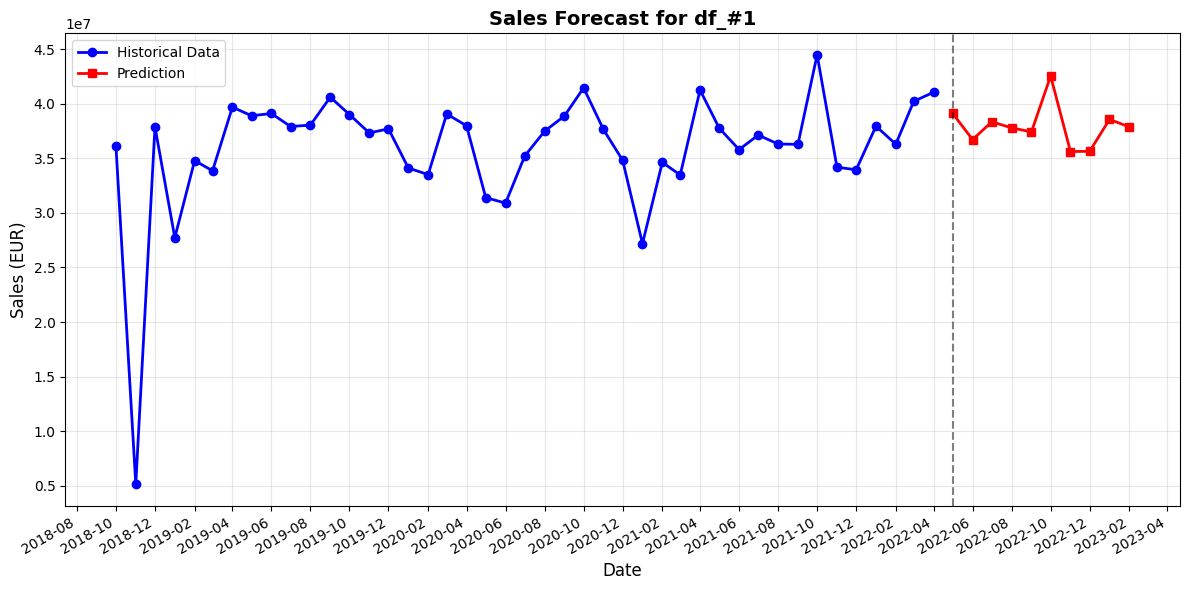

Processing GCK: df_#3
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


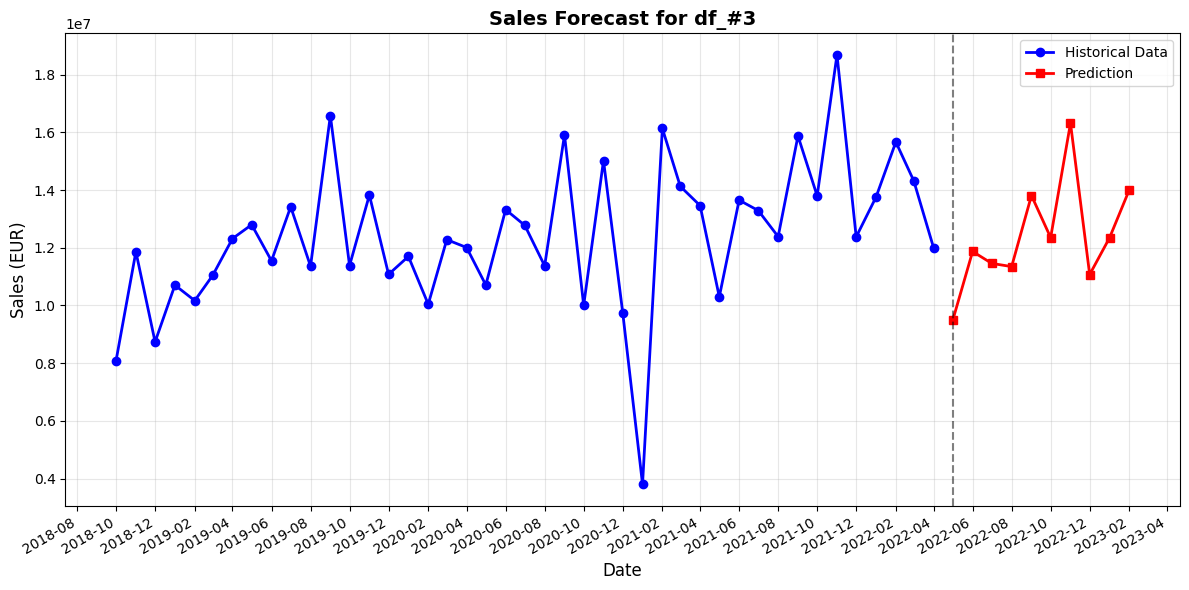

Processing GCK: df_#4
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


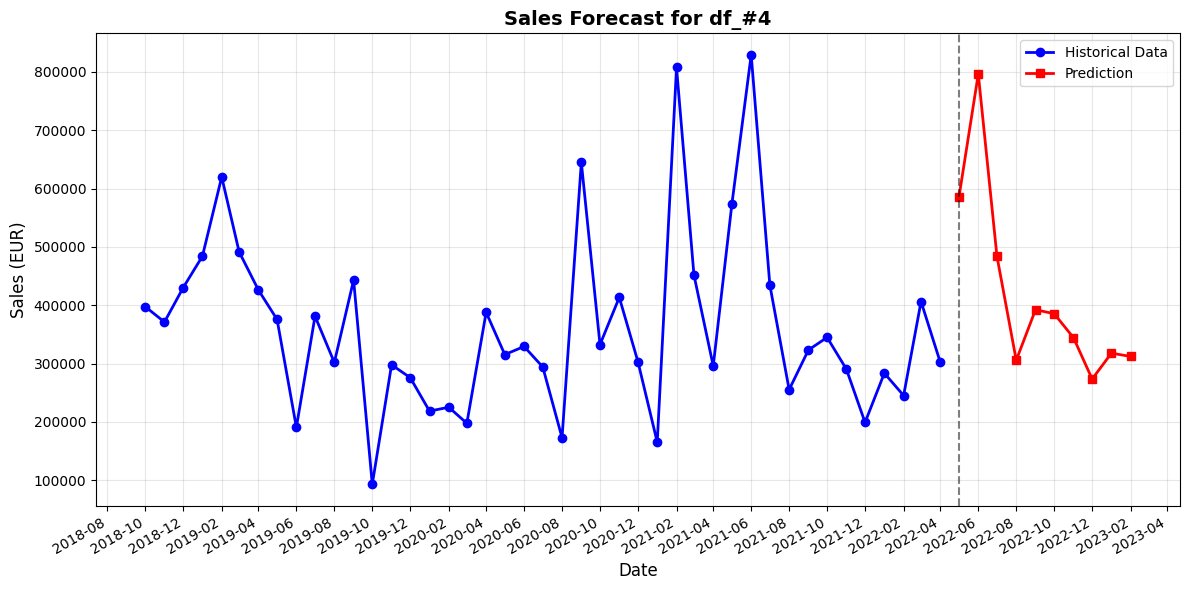

Processing GCK: df_#5
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


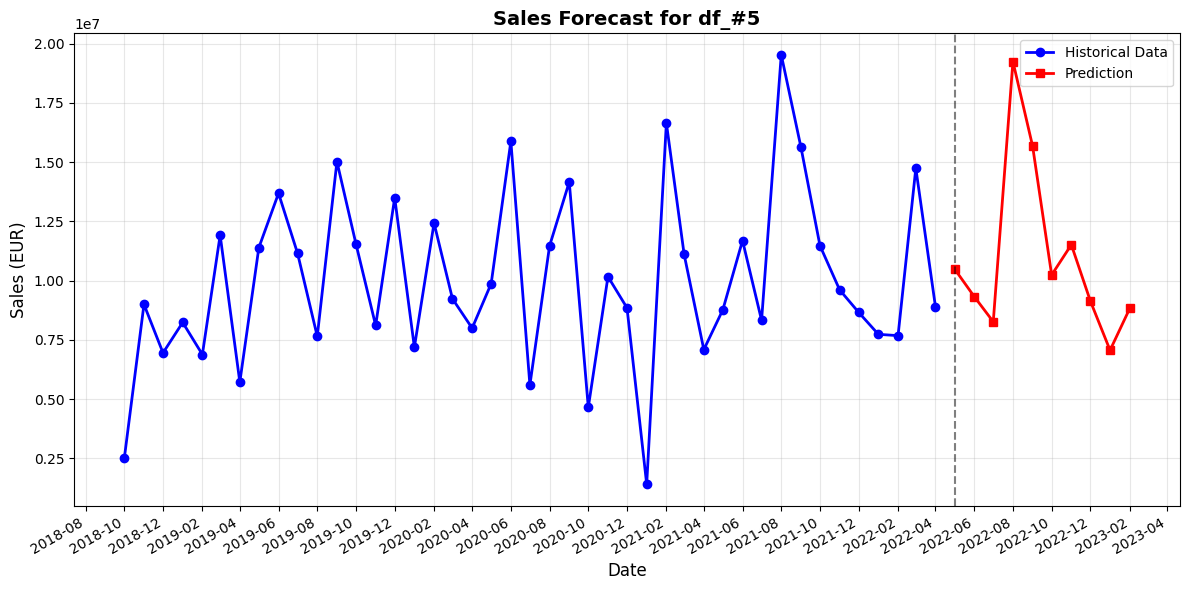

Processing GCK: df_#6
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


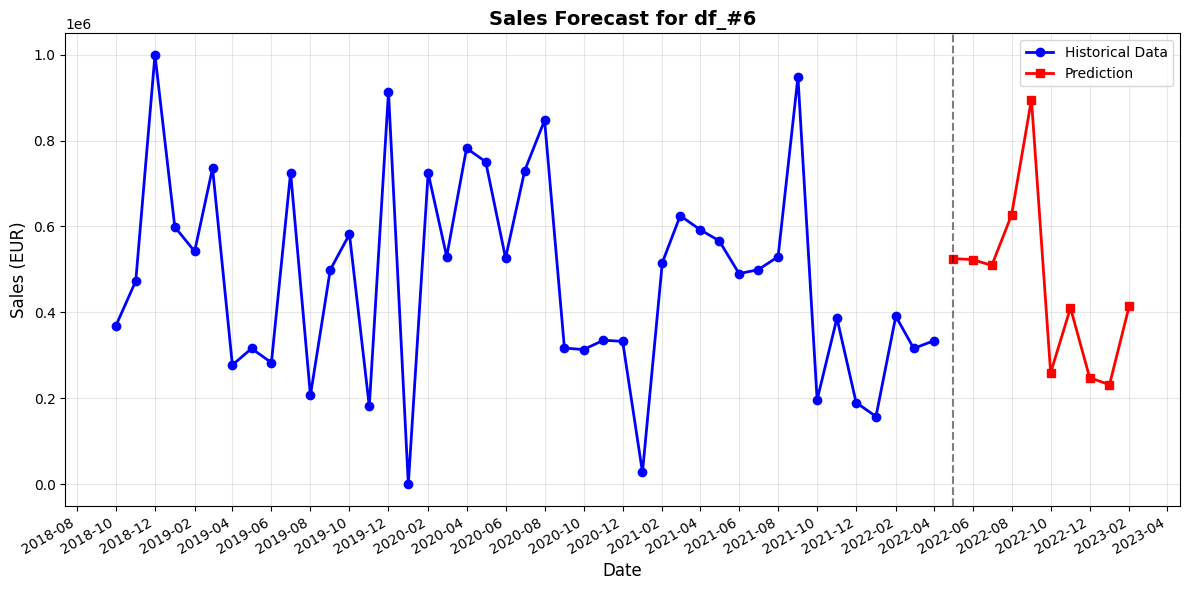

Processing GCK: df_#8
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


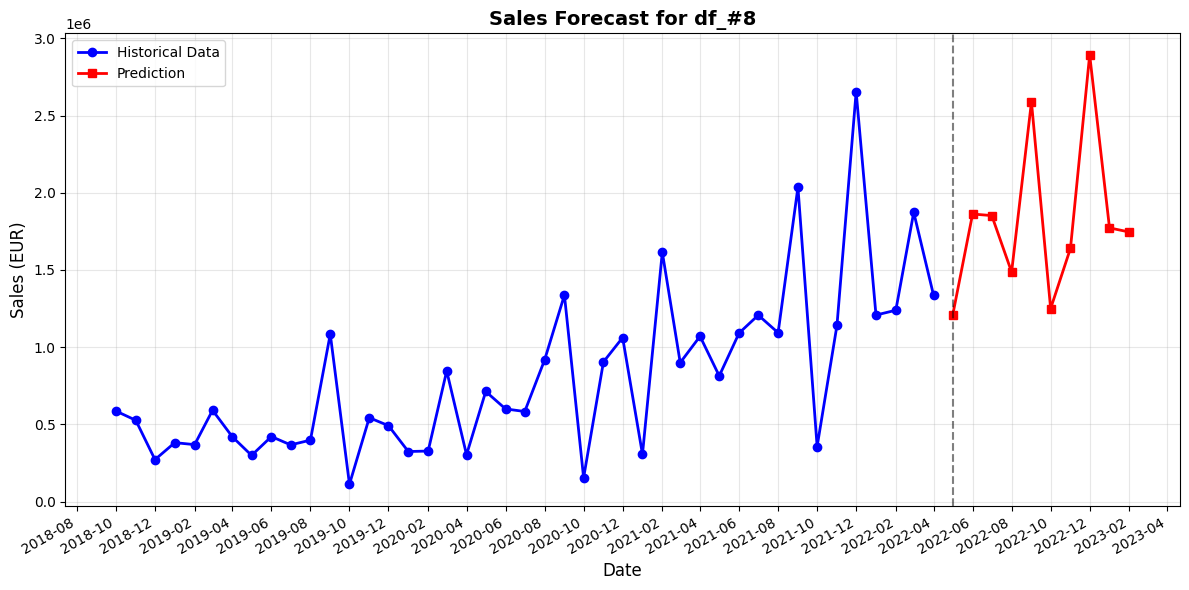

Processing GCK: df_#9
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


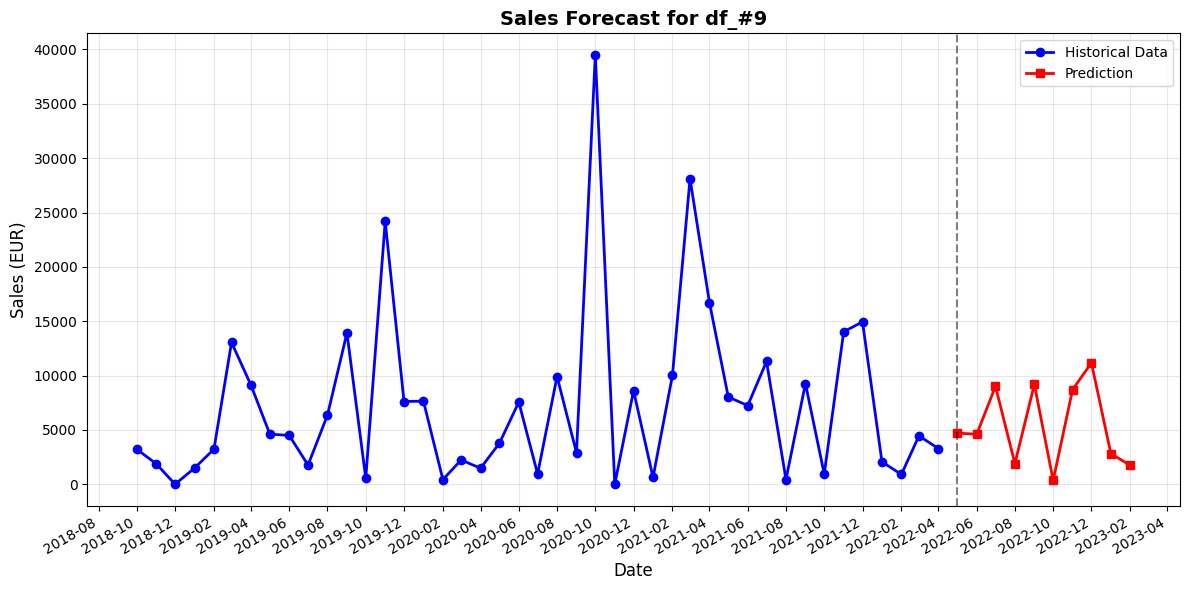

Processing GCK: df_#11
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


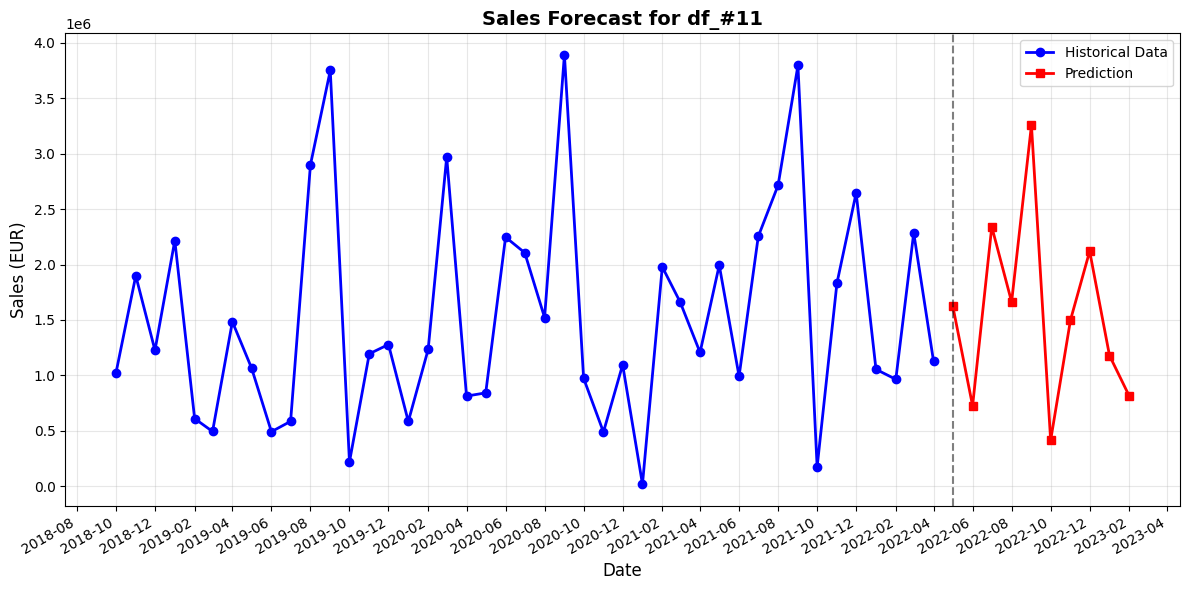

Processing GCK: df_#12
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


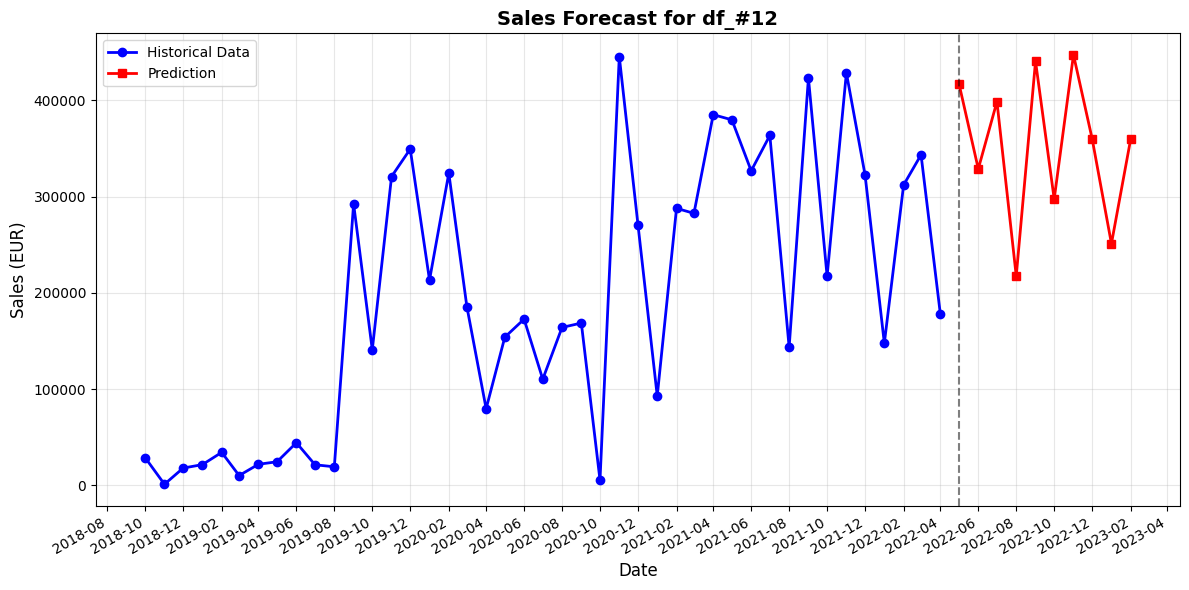

Processing GCK: df_#13
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


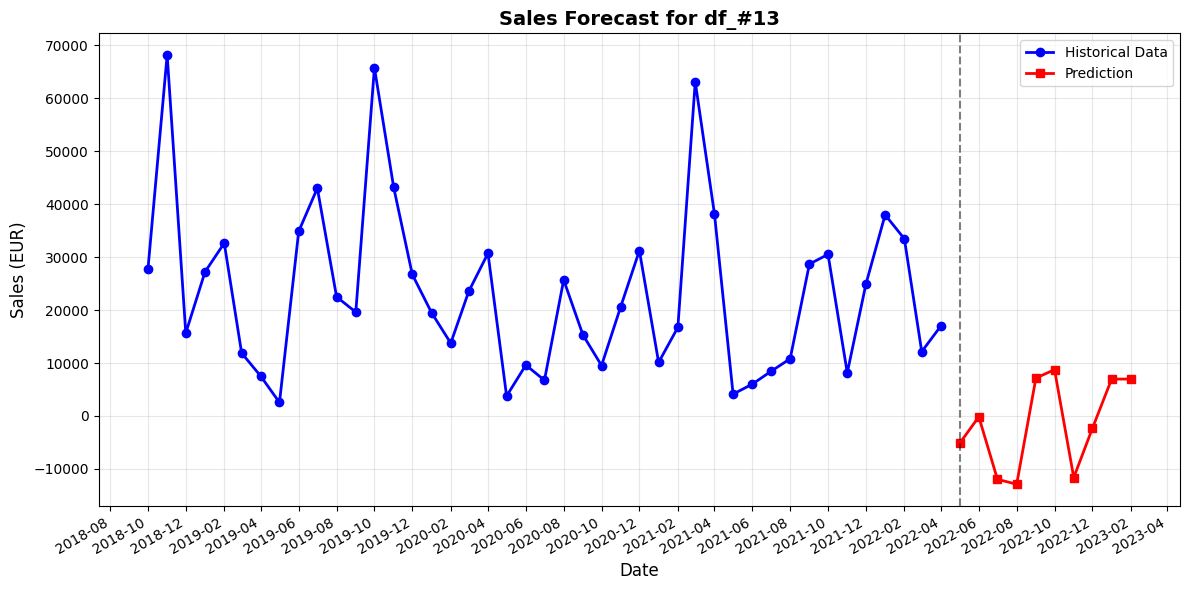

Processing GCK: df_#14
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


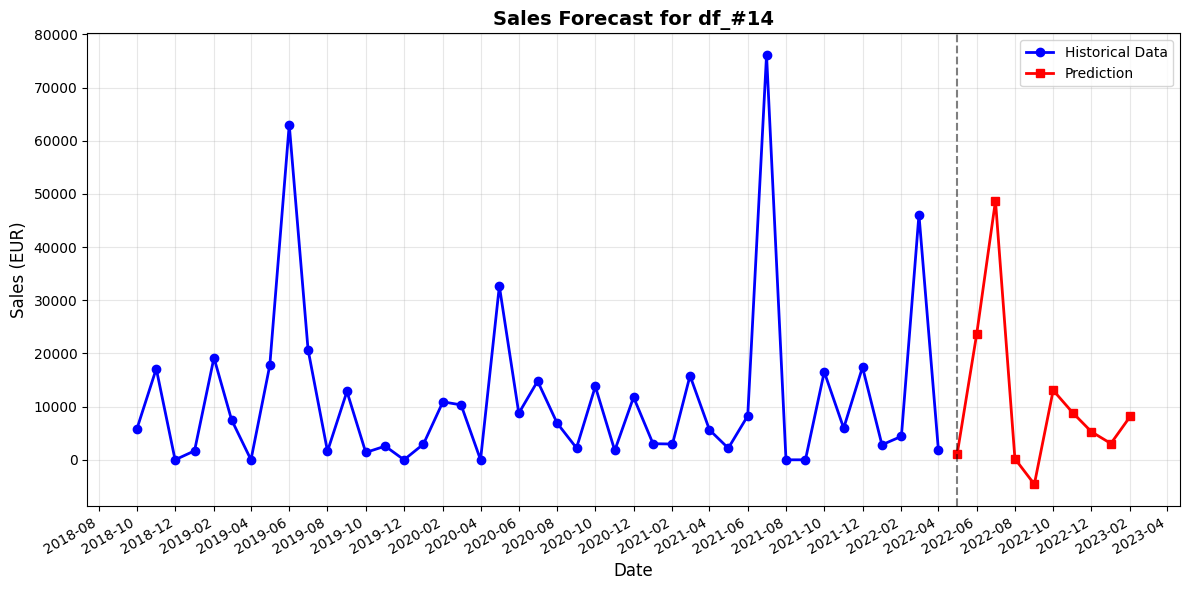

Processing GCK: df_#16
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


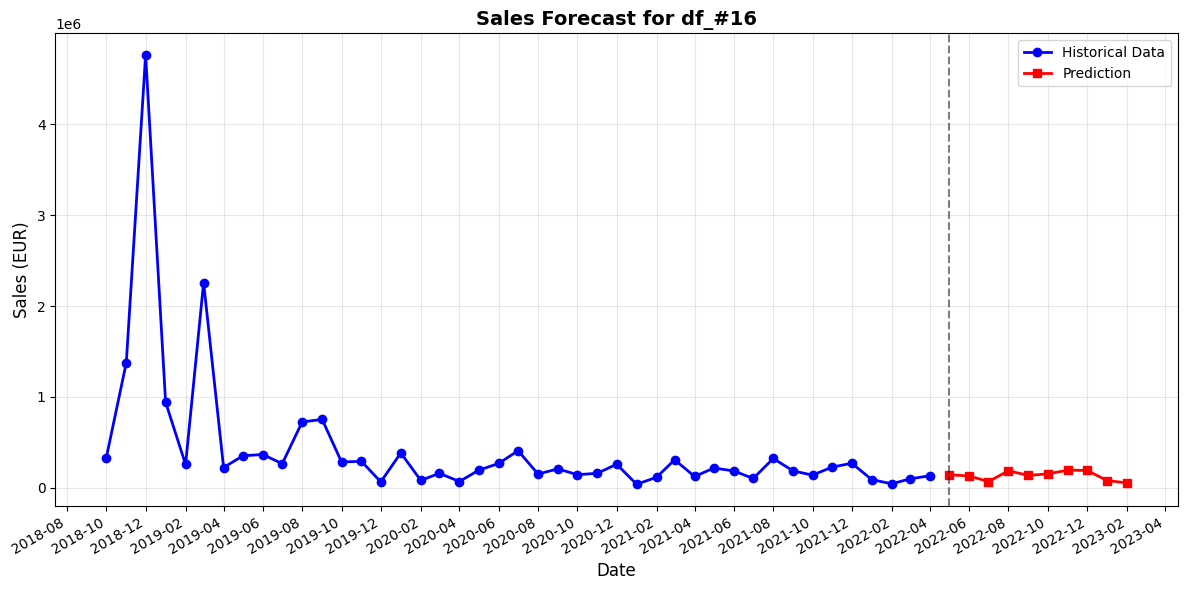

Processing GCK: df_#20
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


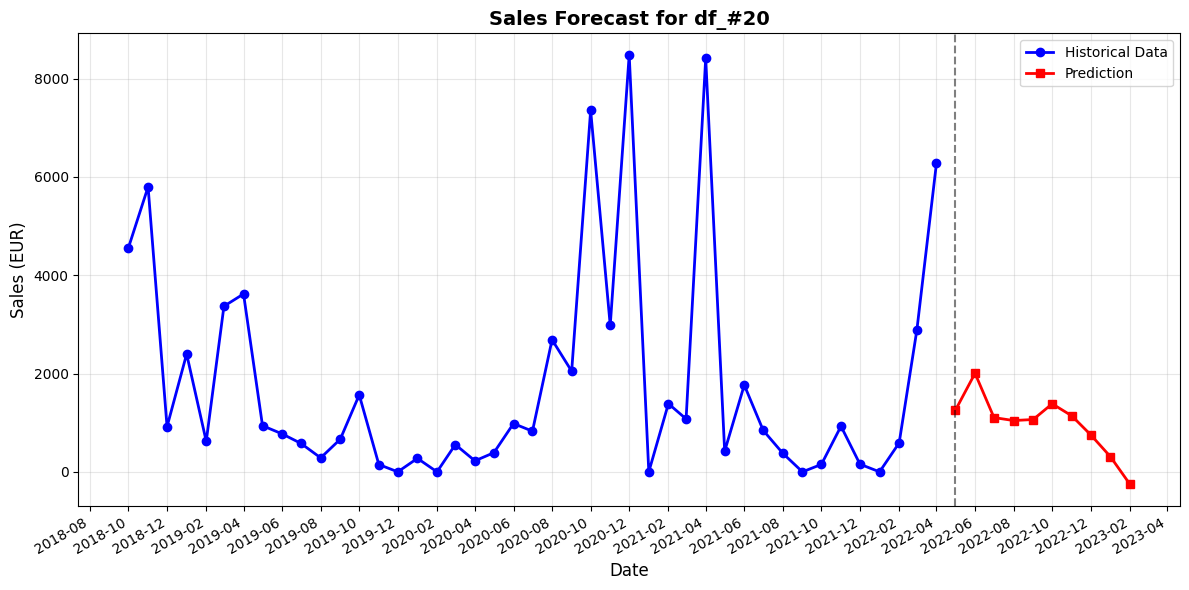

Processing GCK: df_#36
DataFrame shape: (53, 2)
Date range: 2018-10-01 00:00:00 to 2023-02-01 00:00:00
Historical data points: 43
Prediction data points: 10


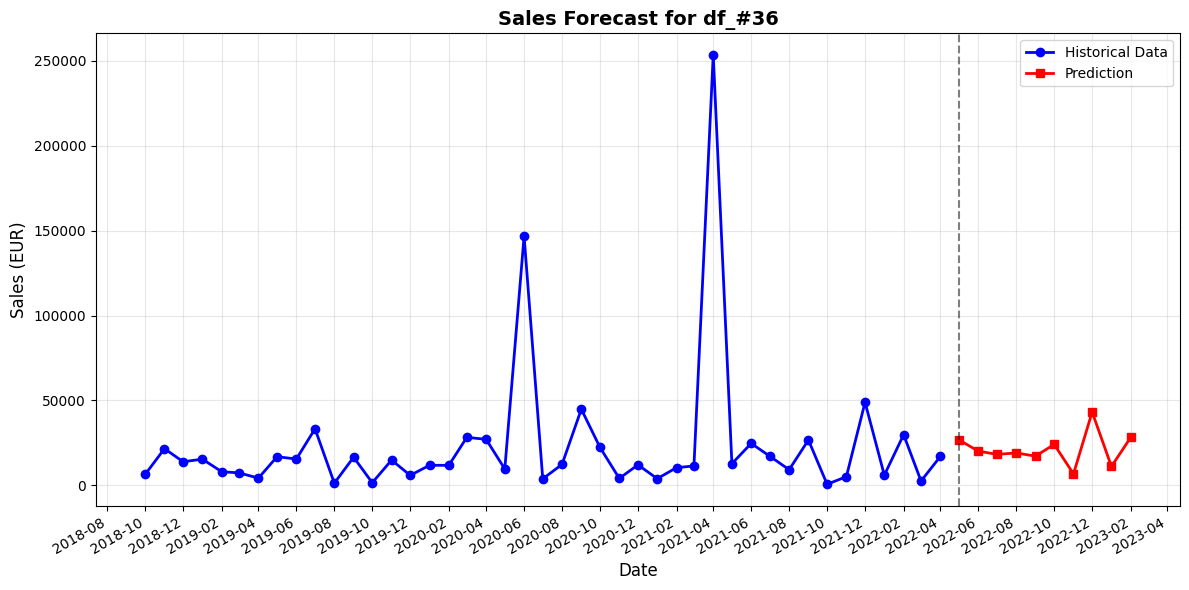

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Define the cutoff date (May 2022 - the first prediction month)
cutoff_date = datetime(2022, 5, 1)

# Debug: Check if merged_dfs has any keys
print(f"Keys in merged_dfs: {list(merged_dfs.keys())}")

# Plotting
for GCK, df in merged_dfs.items():
    print(f"Processing GCK: {GCK}")
    
    # Debug: Check dataframe shape
    print(f"DataFrame shape: {df.shape}")
    
    # Ensure Year-Month is datetime
    df["Year-Month"] = pd.to_datetime(df["Year-Month"])
    
    # Debug: Check date range
    print(f"Date range: {df['Year-Month'].min()} to {df['Year-Month'].max()}")
    
    # Sort data chronologically
    df = df.sort_values("Year-Month")
    
    # Split data by cutoff date
    historical_data = df[df["Year-Month"] < cutoff_date]
    prediction_data = df[df["Year-Month"] >= cutoff_date]
    
    # Debug: Check split
    print(f"Historical data points: {len(historical_data)}")
    print(f"Prediction data points: {len(prediction_data)}")
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot historical data in blue
    plt.plot(historical_data["Year-Month"], historical_data["Sales_EUR"], 
             marker='o', linestyle='-', linewidth=2, 
             markersize=6, label='Historical Data', color='blue')
    
    # Plot prediction data in red
    plt.plot(prediction_data["Year-Month"], prediction_data["Sales_EUR"], 
             marker='s', linestyle='-', linewidth=2, 
             markersize=6, label='Prediction', color='red')
    
    # Format the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate()
    
    # Add vertical line at the cutoff date
    plt.axvline(x=cutoff_date, color='black', linestyle='--', alpha=0.5)
    
    # Enhance visuals
    plt.title(f"Sales Forecast for {GCK}", fontsize=14, fontweight='bold')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Sales (EUR)", fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Also try to show it
    plt.show()

### 11. 4 - Our final results are an average betwen the Prophet and the LSTN

In [53]:
lstm_results= pd.read_csv("formatted_test_output.csv", delimiter=';')
# Get uniques of Mapped_GCK df_test 
order = df_test["Mapped_GCK"].unique()

oder = list(order)

lstm_results["Mapped_GCK"] = pd.Categorical(
    lstm_results["Mapped_GCK"], 
    categories=order, 
    ordered=True
)

# Now sort the DataFrame using the custom GCK order
lstm_results = lstm_results.sort_values("Mapped_GCK").reset_index(drop=True)
lstm_results.head(20)


,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,14464613.92
1,Jun 22,#3,11945903.18
2,Jul 22,#3,12801523.71
3,Aug 22,#3,14707868.75
4,Sep 22,#3,15249913.17
5,Okt 22,#3,17194412.69
6,Nov 22,#3,13894652.64
7,Dez 22,#3,12716980.10
8,Jan 23,#3,13929479.75
9,Feb 23,#3,15123906.31


In [54]:
df_train = pd.read_csv("df_train.csv", delimiter=',')
# Convert the Year-Month column to german using the month_map
#df_train["Year-Month"] = df_train["Year-Month"].replace(month_map)
# Convert the Year-Month name to Month Year names 
df_train["Month Year"] = df_train["Year-Month"]

# Drop the Year-Month column
df_train.drop(columns=["Year-Month"], inplace=True)

# Put Month Year in position teh firts oclumn positon 
df_train = df_train[["Month Year"] + [col for col in df_train.columns if col != "Month Year"]]

# Convert Month Year to datetime64[ns] 
df_train["Month Year"] = pd.to_datetime(df_train["Month Year"], format="%Y-%m-%d")

df_train.head()

,Month Year,Mapped_GCK,Sales_EUR
0,2018-10-01,#1,36098919.06
1,2018-10-01,#11,1021303.50
2,2018-10-01,#12,28686.33
3,2018-10-01,#13,27666.10
4,2018-10-01,#14,5770.00


In [55]:
# Rename Sales_EUR to Sales_EUR_lstm
lstm_results.rename(columns={"Sales_EUR": "Sales_EUR_lstm"}, inplace=True)

# Now we add a new column called Sales_EUR_proph which is the same as Sales_EUR in the df_test
lstm_results["Sales_EUR_proph"] = df_test["Sales_EUR"]

# Get a new column called Average_Sales_EUR which is the average of Sales_EUR_lstm and Sales_EUR_proph
lstm_results["Average_Sales_EUR"] = (lstm_results["Sales_EUR_lstm"] + lstm_results["Sales_EUR_proph"]) / 2

# make sure that the numbes in average are not in euclidean
# Ensure average sales are shown as standard decimal numbers rounded to 2 decimals
lstm_results["Average_Sales_EUR"] = lstm_results["Average_Sales_EUR"].apply(lambda x: round(float(x), 2))

# Drop the columns Sales_EUR_lstm and Sales_EUR_proph
lstm_results.drop(columns=["Sales_EUR_lstm", "Sales_EUR_proph"], inplace=True)

In [56]:
lstm_results.head(15)
final_visual_df = lstm_results.copy()

# Convert the Year-Month column to datetime
final_visual_df["Month Year"] = pd.to_datetime(final_visual_df["Month Year"], format="%b %y")

# Sort by GCK first, then by Month Year in descending order
final_visual_df.head()

# Rename Average_Sales_EUR to Sales_EUR
final_visual_df.rename(columns={"Average_Sales_EUR": "Sales_EUR"}, inplace=True)
final_visual_df.head()


,Month Year,Mapped_GCK,Sales_EUR
0,2022-05-01,#3,11976658.96
1,2022-06-01,#3,11908469.59
2,2022-07-01,#3,12129417.36
3,2022-08-01,#3,13027441.38
4,2022-09-01,#3,14530362.59


In [ ]:
# Merge final_visual_df with df_train, put the final_visual_df udner df_train
# Concatenate df_train at the top and final_visual_df below it
df_merged = pd.concat([df_train, final_visual_df], ignore_index=True)

df_merged.head(20)

# First order by Mapped_GCK and then by secondary reorder by Month Year in descending order
df_merged.sort_values(by=["Mapped_GCK", "Month Year"], ascending=[True, True], inplace=True)
df_merged.head(20)

# Set Sales_EUR max decimals 2 
df_merged["Sales_EUR"] = df_merged["Sales_EUR"].apply(lambda x: round(float(x), 2))

# Set Month Year to be year month format
df_merged["Month Year"] = df_merged["Month Year"].dt.strftime("%d-%m-%Y")

# Export df_merged as a csv file called final_results.csv
df_merged.to_excel("final_results.xlsx", index=False, sheet_name="Final Results")